In [157]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from sklearn.utils.multiclass import unique_labels
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout



%matplotlib inline

In [158]:
import warnings as wrn

wrn.filterwarnings('ignore')

pd.set_option('display.max_columns',None)



In [159]:
info =  pd.read_csv('DATA/caravan.info',sep ='\t', header='infer',engine='python')
info.head(10)

,DATA DICTIONARY
0,Nr Name Description Domain
1,1 MOSTYPE Customer Subtype see L0
2,2 MAANTHUI Number of houses 1 – 10
3,3 MGEMOMV Avg size household 1 – 6
4,4 MGEMLEEF Avg age see L1
5,5 MOSHOOFD Customer main type see L2
6,6 MGODRK Roman catholic see L3
7,7 MGODPR Protestant ...
8,8 MGODOV Other religion
9,9 MGODGE No religion


### Convert the info file to The proper dataframe format 

In [160]:
# creating custom col names for better understanding 
new_cols = [
    "Customer_subtype",
    "Houses",
    "Avg_size",
    "Avg_age",
    "Customer_type",
    "Roman_catholic",
    "Protestant",
    "Other_religion",
    "No_religion",
    "Married",
    "Living_together",
    "Other_relation",
    "Singles",
    "Without_children",
    "with_children",
    "High_education",
    "Medium_education",
    "Lower_education",  
    "High_status",
    "Entrepreneur",
    "Farmer",
    "Middle_management",
    "Skilled_labourers",
    "Unskilled_labourers", 
    "Class_A",
    "Class_B1",
    "Class_B2",
    "Class_C",
    "Class_D",
    "Rented_house",
    "Home_owners",
    "1_cars",
    "2_cars",
    "No_cars",
    "National_health_service",
    "Private_health_insurance",
    "Income_<_30.000",
    "Income_30-45.000",
    "Income_45-75.000",
    "Income_75-122.000",
    "Income_>_123.000",
    "Average_income",
    "Purchasing_power_class",
    "Private_third_party_insurance",
    "Firms_insurance",
    "Aggriculture_insurance",
    "Car_policies",    
    "Delivery_van policies",
    "Motorcycle/scooter_policies",
    "Lorry_policies",  
    "Trailer_policies",
    "Tractor_policies",
    "Agricultural_machines_policies",
    "Moped_policies",
    "Life_insurances",    
    "Private_accident_insurance",
    "Family_accidents_insurance",
    "Disability_insurance",
    "Fire_policies",
    "Surfboard_policies",   
    "Boat_policies",
    "Bicycle_policies",
    "Property_insurance",
    "Social_security_insurance",   
    "#_Private_third_party_insurance",
    "#_Firms_insurance",   
    "#_Aggriculture_insurance",
    "#_Car_policies",
    "#_Delivery_van policies",
    "#_Motorcycle/scooter_policies",   
    "#_Lorry_policies",  
    "#_Trailer_policies",
    "#_Tractor_policies",
    "#_Agricultural_machines_policies",
    "#_Moped_policies",
    "#_Life_insurances",
    "#_Private_accident_insurance",
    "#_Family_accidents_insurance",
    "#_Disability_insurance",
    "#_Fire_policies",    
    "#_Surfboard_policies",
    "#_Boat_policies",
    "#_Bicycle_policies",
    "#_Property_insurance",
    "#_Social_security insurance",
    "CARAVAN"
    
]
    

In [161]:
#creating  a dictonary

info_data = {
    "Index":[],
    "Name":[],
    "Description":[],
    "col_name":new_cols,
    "Ref.":[]   
} 

In [162]:
# convert data frame to list for processing 
rows = info["DATA DICTIONARY"].tolist()

# select 1:86 row row extract the necessary info and add to dict
for  i in rows[1:87]:
    a = i.split("see")
    x = a[0].split()
    
    info_data["Index"].append(x[0])
    info_data["Name"].append(x[1])
    info_data["Description"].append(" ".join(x[2:]))
    
    if len(a) == 2:
        info_data["Ref."].append(a[1])
    else:
        info_data["Ref."].append(None)
        


In [163]:
# convert dict to dataframe obj
info_df = pd.DataFrame(info_data)

In [164]:
info_df

,Index,Name,Description,col_name,Ref.
0,1,MOSTYPE,Customer Subtype,Customer_subtype,L0
1,2,MAANTHUI,Number of houses 1 – 10,Houses,None
2,3,MGEMOMV,Avg size household 1 – 6,Avg_size,None
3,4,MGEMLEEF,Avg age,Avg_age,L1
4,5,MOSHOOFD,Customer main type,Customer_type,L2
...,...,...,...,...,...
81,82,APLEZIER,Number of boat policies,#_Boat_policies,None
82,83,AFIETS,Number of bicycle policies,#_Bicycle_policies,None
83,84,AINBOED,Number of property insurance policies,#_Property_insurance,None
84,85,ABYSTAND,Number of social security insurance policies,#_Social_security insurance,None


In [165]:
# align text to left hand side 
info_df = info_df.style.set_properties(**{'text-align': 'left'})
info_df = info_df.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

In [166]:
info_df

,Index,Name,Description,col_name,Ref.
0,1,MOSTYPE,Customer Subtype,Customer_subtype,L0
1,2,MAANTHUI,Number of houses 1 – 10,Houses,None
2,3,MGEMOMV,Avg size household 1 – 6,Avg_size,None
3,4,MGEMLEEF,Avg age,Avg_age,L1
4,5,MOSHOOFD,Customer main type,Customer_type,L2
5,6,MGODRK,Roman catholic,Roman_catholic,L3
6,7,MGODPR,Protestant ...,Protestant,None
7,8,MGODOV,Other religion,Other_religion,None
8,9,MGODGE,No religion,No_religion,None
9,10,MRELGE,Married,Married,None


In [167]:
# read data
train = pd.read_table("DATA/caravan.train",names = new_cols )
test = pd.read_table("DATA/caravan.test",names = new_cols[:-1])

In [168]:
train.shape

(5822, 86)

In [169]:
test.shape

(4000, 85)

In [170]:
from pprint import pprint

In [171]:
# L0 Value label -> dict object 
L0 = dict()
r = info["DATA DICTIONARY"].iloc[89:130].tolist()
for  i in r:
    a = i.split()
    L0[int(a[0])] = " ".join(a[1:])
    
pprint(L0)

{1: 'High Income, expensive child',
 2: 'Very Important Provincials',
 3: 'High status seniors',
 4: 'Affluent senior apartments',
 5: 'Mixed seniors',
 6: 'Career and childcare',
 7: "Dinki's (double income no kids)",
 8: 'Middle class families',
 9: 'Modern, complete families',
 10: 'Stable family',
 11: 'Family starters',
 12: 'Affluent young families',
 13: 'Young all american family',
 14: 'Junior cosmopolitan',
 15: 'Senior cosmopolitans',
 16: 'Students in apartments',
 17: 'Fresh masters in the city',
 18: 'Single youth',
 19: 'Suburban youth',
 20: 'Etnically diverse',
 21: 'Young urban have-nots',
 22: 'Mixed apartment dwellers',
 23: 'Young and rising',
 24: 'Young, low educated',
 25: 'Young seniors in the city',
 26: 'Own home elderly',
 27: 'Seniors in apartments',
 28: 'Residential elderly',
 29: 'Porchless seniors: no front yard',
 30: 'Religious elderly singles',
 31: 'Low income catholics',
 32: 'Mixed seniors',
 33: 'Lower class large families',
 34: 'Large family, e

In [172]:
# L1 Value label -> dict object 
L1 = dict()
r = info["DATA DICTIONARY"].iloc[131:136].tolist()
for i in r:
    a = i.split()
    L1[int(a[0])] = " ".join(a[1:])
pprint(L1)

{1: '20-30 years',
 2: '30-40 years',
 3: '40-50 years',
 4: '50-60 years',
 5: '60-70 years'}


In [173]:
# L2 Value label -> dict object 
L2 = dict()
r = info["DATA DICTIONARY"].iloc[138:148].tolist()
for i in r:
    a = i.split()
    L2[int(a[0])] = " ".join(a[1:])
pprint(L2)

{1: 'Successful hedonists',
 2: 'Driven Growers',
 3: 'Average Family',
 4: 'Career Loners',
 5: 'Living well',
 6: 'Cruising Seniors',
 7: 'Retired and Religeous',
 8: 'Family with grown ups',
 9: 'Conservative families',
 10: 'Farmers'}


In [174]:
# L3 Value label -> dict object 
L3 = dict()
r = info["DATA DICTIONARY"].iloc[149:159].tolist()
for i in r:
    a = i.split()
    L3[int(a[0])] = " ".join(a[1:])
pprint(L3)

{0: '0%',
 1: '1 - 10%',
 2: '11 - 23%',
 3: '24 - 36%',
 4: '37 - 49%',
 5: '50 - 62%',
 6: '63 - 75%',
 7: '76 - 88%',
 8: '89 - 99%',
 9: '100%'}


In [175]:
# L4 Value label -> dict object 
L4 = dict()
r = info["DATA DICTIONARY"].iloc[160:170].tolist()
for i in r:
    a = i.split()
    L4[int(a[0])] = " ".join(a[1:])
pprint(L4)

{0: 'f 0',
 1: 'f 1 – 49',
 2: 'f 50 – 99',
 3: 'f 100 – 199',
 4: 'f 200 – 499',
 5: 'f 500 – 999',
 6: 'f 1000 – 4999',
 7: 'f 5000 – 9999',
 8: 'f 10.000 - 19.999',
 9: 'f 20.000 - ?'}


### Map Levels dictionary data to dataframe 

In [176]:
train["Customer_subtype"] = train["Customer_subtype"].map(L0)
train["Avg_age"] = train["Avg_age"].map(L1)
train["Customer_type"] = train["Customer_type"].map(L2)
train["Roman_catholic"] = train["Roman_catholic"].map(L3)
train["Private_third_party_insurance"] = train["Private_third_party_insurance"].map(L4)

In [177]:
train.head(10)

,Customer_subtype,Houses,Avg_size,Avg_age,Customer_type,Roman_catholic,Protestant,Other_religion,No_religion,Married,Living_together,Other_relation,Singles,Without_children,with_children,High_education,Medium_education,Lower_education,High_status,Entrepreneur,Farmer,Middle_management,Skilled_labourers,Unskilled_labourers,Class_A,Class_B1,Class_B2,Class_C,Class_D,Rented_house,Home_owners,1_cars,2_cars,No_cars,National_health_service,Private_health_insurance,Income_<_30.000,Income_30-45.000,Income_45-75.000,Income_75-122.000,Income_>_123.000,Average_income,Purchasing_power_class,Private_third_party_insurance,Firms_insurance,Aggriculture_insurance,Car_policies,Delivery_van policies,Motorcycle/scooter_policies,Lorry_policies,Trailer_policies,Tractor_policies,Agricultural_machines_policies,Moped_policies,Life_insurances,Private_accident_insurance,Family_accidents_insurance,Disability_insurance,Fire_policies,Surfboard_policies,Boat_policies,Bicycle_policies,Property_insurance,Social_security_insurance,#_Private_third_party_insurance,#_Firms_insurance,#_Aggriculture_insurance,#_Car_policies,#_Delivery_van policies,#_Motorcycle/scooter_policies,#_Lorry_policies,#_Trailer_policies,#_Tractor_policies,#_Agricultural_machines_policies,#_Moped_policies,#_Life_insurances,#_Private_accident_insurance,#_Family_accidents_insurance,#_Disability_insurance,#_Fire_policies,#_Surfboard_policies,#_Boat_policies,#_Bicycle_policies,#_Property_insurance,#_Social_security insurance,CARAVAN
0,Lower class large families,1,3,30-40 years,Family with grown ups,0%,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,f 0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Mixed small town dwellers,1,2,30-40 years,Family with grown ups,1 - 10%,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,f 50 – 99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Mixed small town dwellers,1,2,30-40 years,Family with grown ups,0%,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,f 50 – 99,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,"Modern, complete families",1,3,40-50 years,Average Family,11 - 23%,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,f 0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Large family farms,1,4,30-40 years,Farmers,1 - 10%,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,f 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,Young and rising,1,2,20-30 years,Living well,0%,5,0,5,0,6,3,3,5,2,0,5,4,2,0,0,4,2,2,2,2,2,4,2,9,0,5,3,3,9,0,5,2,3,0,0,3,3,f 0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Large religous families,2,3,30-40 years,Conservative families,11 - 23%,2,0,5,7,2,0,0,3,6,0,4,5,0,0,0,4,1,5,0,1,4,5,0,6,3,8,0,1,9,0,4,3,3,0,0,3,5,f 0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Lower class large families,1,2,40-50 years,Family with grown ups,0%,7,0,2,7,2,0,0,5,4,0,3,6,2,0,0,2,5,2,2,1,2,5,2,0,9,4,4,2,6,3,2,5,3,0,0,3,3,f 0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,Lower class large families,1,2,50-60 years,Family with grown ups,0%,1,3,6,6,0,3,3,3,3,0,1,8,1,1,0,1,8,1,1,1,0,8,1,9,0,5,2,3,7,2,7,2,1,0,0,2,3,f 0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Family starters,2,3,40-50 years,Average Family,24 - 36%,5,0,2,7,0,2,2,2,6,0,4,5,2,0,0,3,3,3,1,2,1,4,2,0,9,6,1,2,6,3,2,3,3,1,0,4,7,f 50 – 99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Data visualization

Text(0.5, 1.0, 'Class distribution\n(0 : No Caravan Policy    ||    1 : Yes Caravan Policy)')

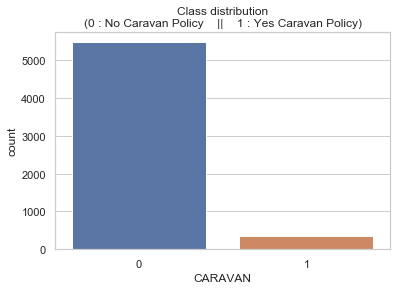

In [178]:
sns.countplot('CARAVAN',data =train)
plt.title('Class distribution\n(0 : No Caravan Policy    ||    1 : Yes Caravan Policy)')

In [179]:
no = round(train['CARAVAN'].value_counts()[0]/len(train)*100,2)

yes = round(train['CARAVAN'].value_counts()[1]/len(train)*100,2)

print('Customer with Caravan Policy : {} % of the dataset'.format(yes))
print('Customer with No Caravan Policy : {} % of the dataset'.format(no))

Customer with Caravan Policy : 5.98 % of the dataset
Customer with No Caravan Policy : 94.02 % of the dataset


### Custom function 

In [180]:
def boxplot(df,width=20,height=200):
    """
    Objective
    ----------
    Draw a box plot to show distributions, skiping all the object variables
    (adjust the width and height to get best possible result)
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
    width: int
        width for box plot
    height: int
        height for box plot
        
    returns
    ----------
    matplotlib Axes
    Returns the Axes object with the plot drawn onto it.   
    """
    
    cols = list(df.select_dtypes(["float64","int64"]).columns)
    sns.set(style="whitegrid")
    fig, axs = plt.subplots(len(cols),figsize=(width,height))
    
    
    for i, col in enumerate(cols):
        sns.boxplot(df[col] , ax = axs[i])

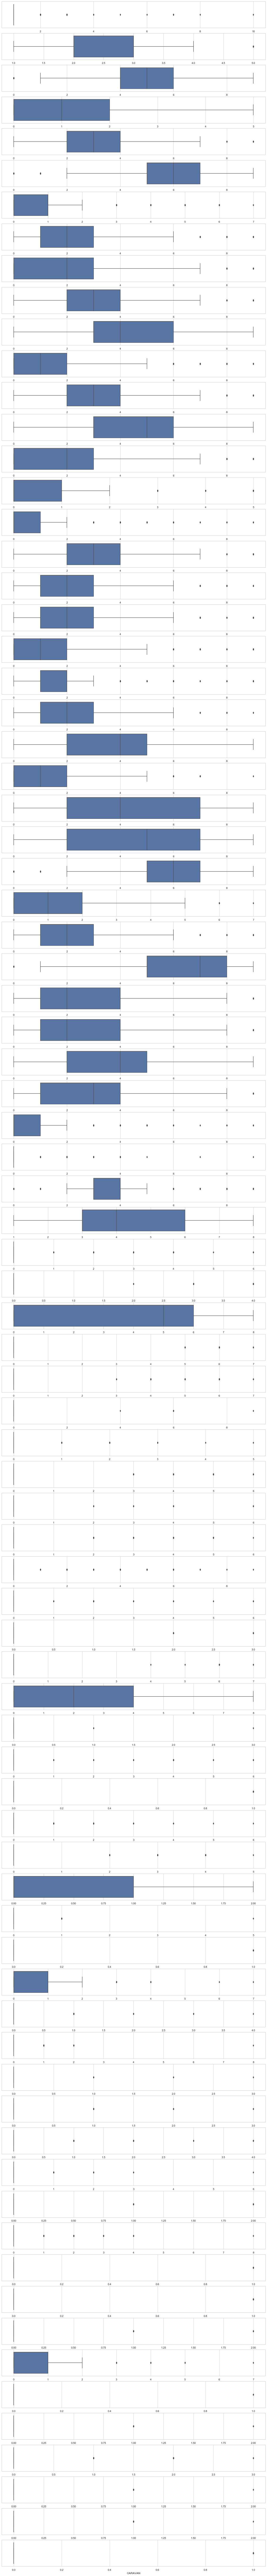

In [181]:
boxplot(train)

From the BoxPlots above, as we can see that there are Outliers in most of the numerical attributes

In [182]:
#sns.set_theme()
sns.set_context("talk", font_scale=1.2)

<Figure size 1440x864 with 0 Axes>

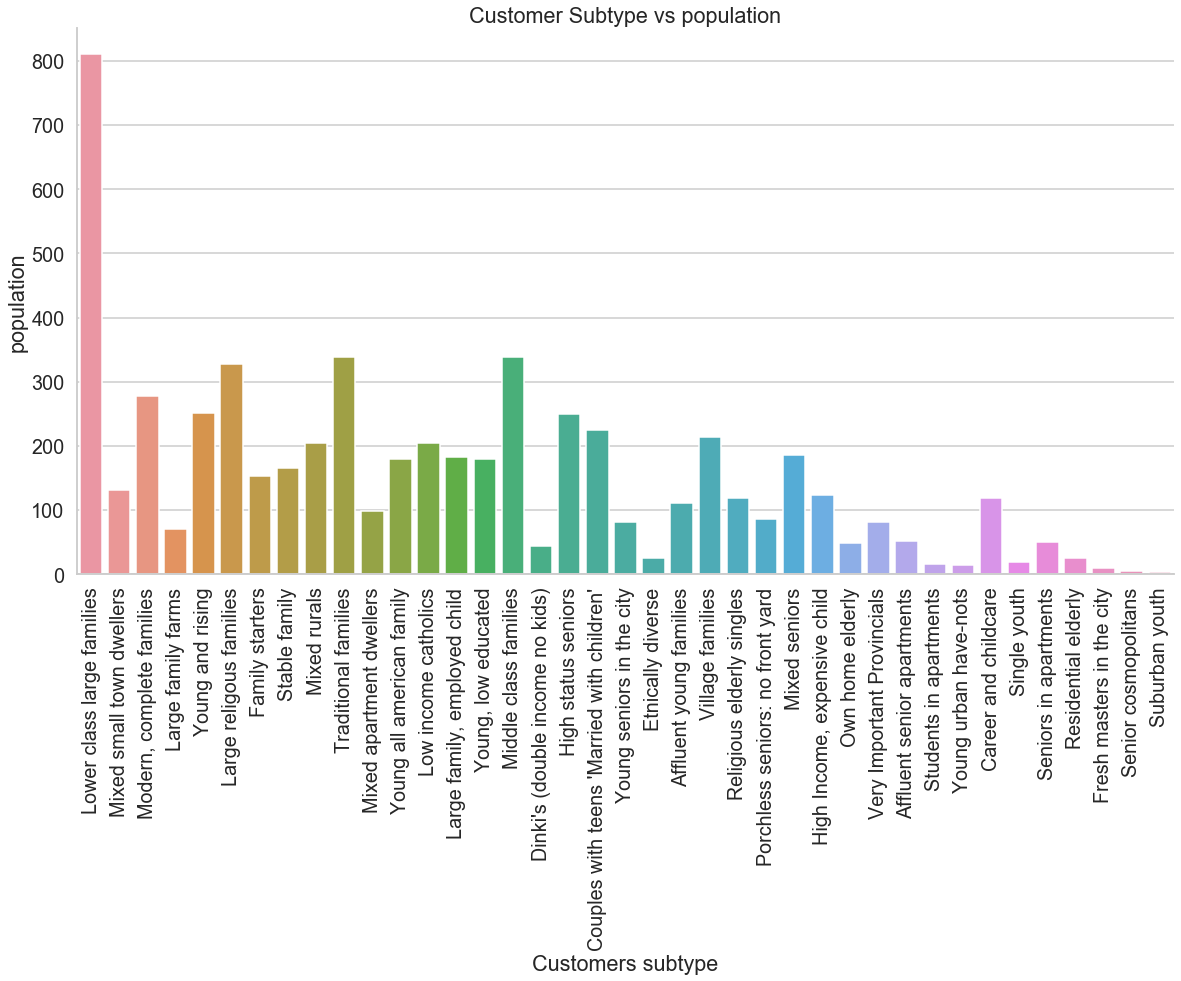

In [183]:
plt.figure(figsize =(20,12))

p =sns.catplot(x= train['Customer_subtype'].index,
               kind = "count",
               data = train['Customer_subtype'],
               height = 9,
              aspect = 2)
p = p.set(title = "Customer Subtype vs population",xlabel = "Customers subtype", ylabel = "population")
p.set_xticklabels(rotation =90)

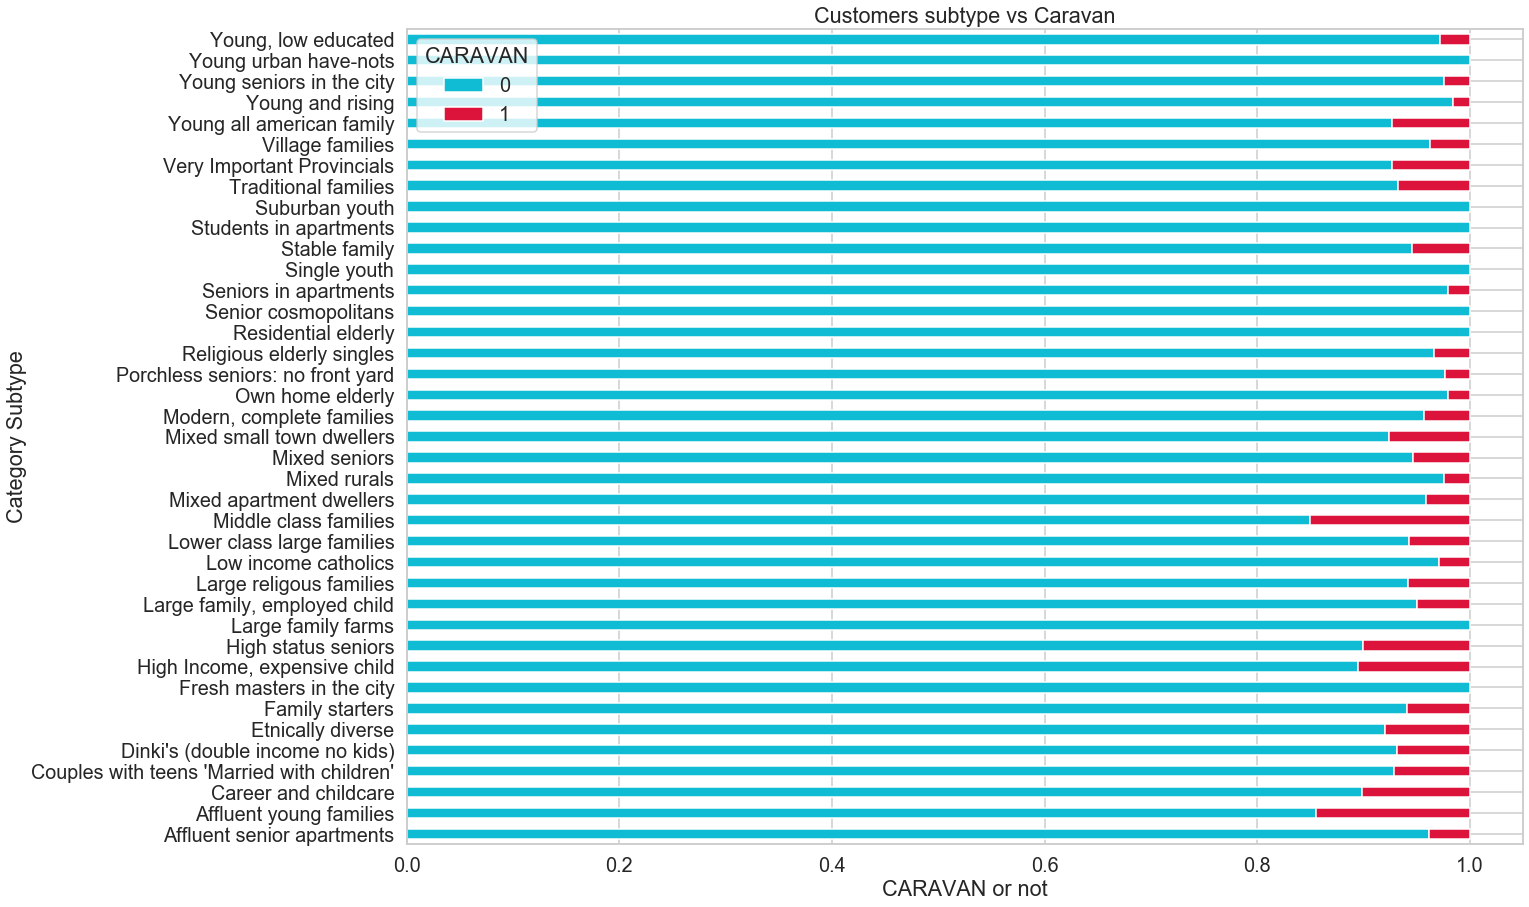

In [184]:
cat = pd.crosstab(train['Customer_subtype'],train['CARAVAN']);
cat = cat.div(cat.sum(1).astype(float), axis=0);
cat.plot(figsize= (20,15), kind='barh', stacked=True, color=['#10bbd4', 'Crimson'], title='Customers subtype vs Caravan', grid=True);
plt.xlabel('CARAVAN or not');
plt.ylabel('Category Subtype');

Senior cosmopolitans, Students in apartments,Residential elderly, Fresh masters in the city, Single youth, Suburban youth, Large
family farms do not have a single Caravan Policy whereas Middle class families, Affluent young families subtypes
have most of the Caravan Policies

<Figure size 1440x864 with 0 Axes>

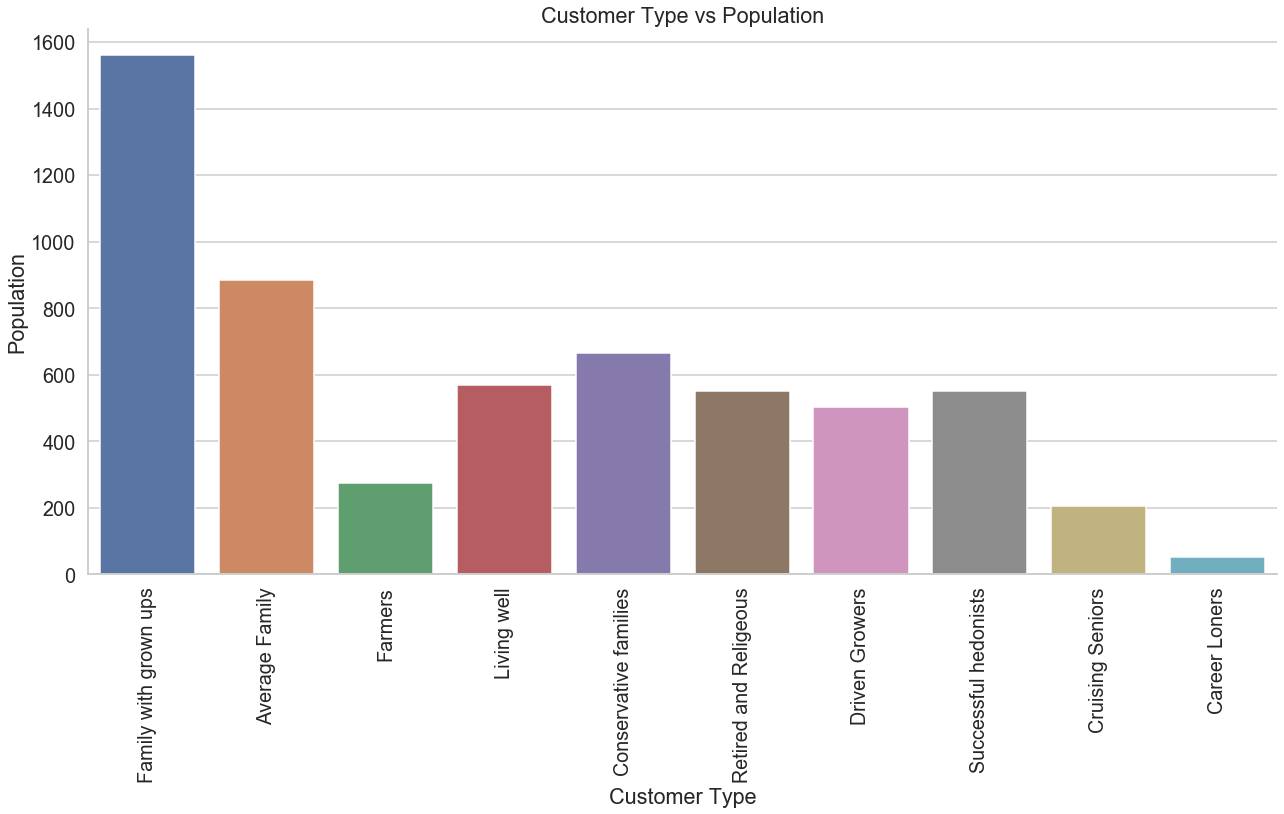

In [185]:
plt.figure(figsize = (20,12))

p = sns.catplot(x = train["Customer_type"].index,
                kind ="count",
                data = train["Customer_type"],
                height = 9,
                aspect = 2
                )
p = p.set(title="Customer Type vs Population",xlabel= "Customer Type",ylabel = "Population")
p.set_xticklabels(rotation = 90)


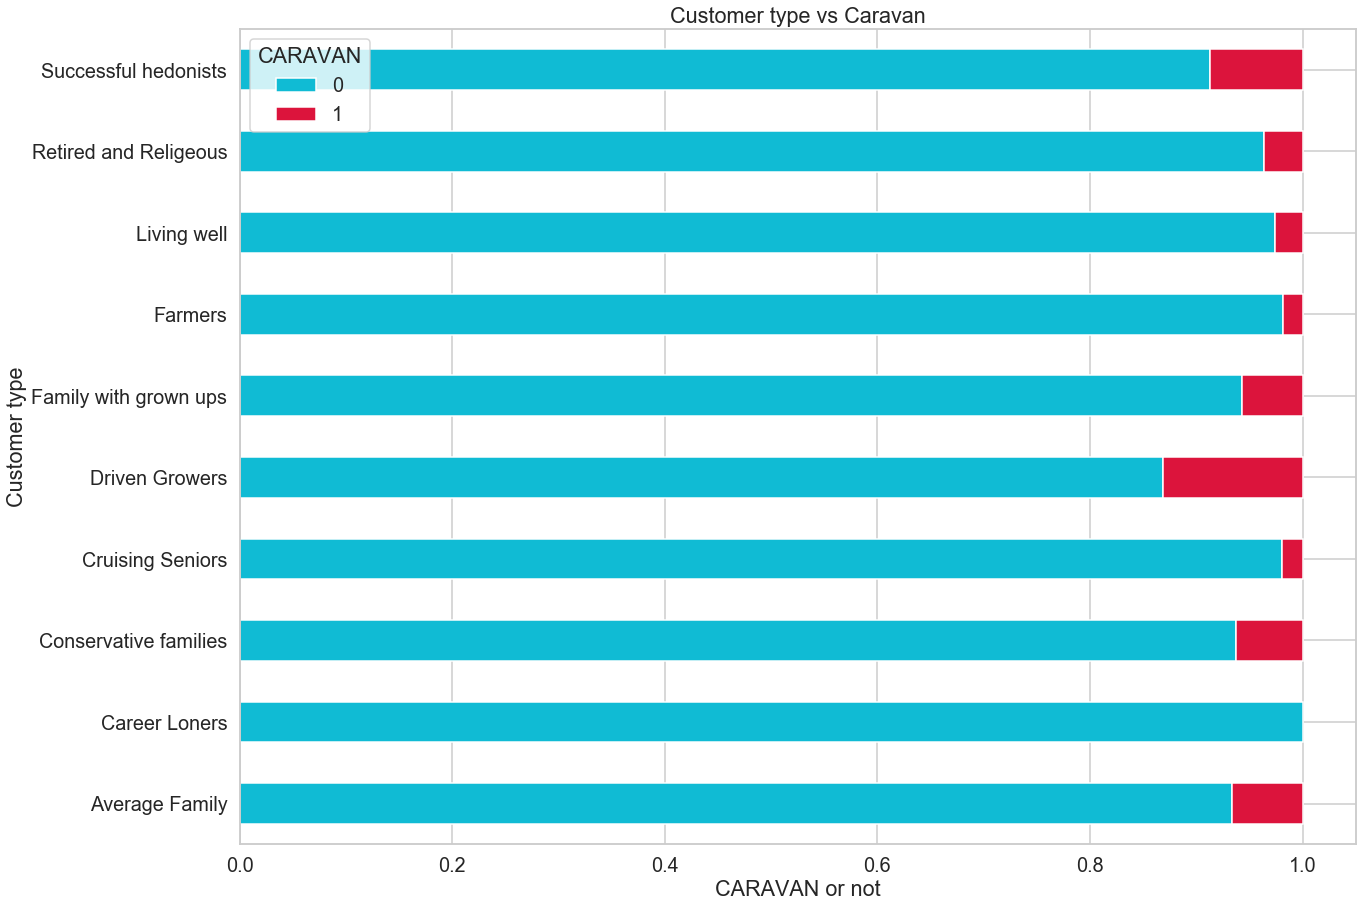

In [186]:
cat = pd.crosstab(train['Customer_type'], train['CARAVAN']);
cat = cat.div(cat.sum(1).astype(float), axis=0);
cat.plot(figsize= (20,15), kind='barh', stacked=True, color=['#10bbd4', 'Crimson'], title='Customer type vs Caravan', grid=True);
plt.ylabel('Customer type');
plt.xlabel('CARAVAN or not');

In [187]:
train[train['CARAVAN']==1]['Customer_type'].value_counts()

Family with grown ups    89
Driven Growers           66
Average Family           59
Successful hedonists     48
Conservative families    42
Retired and Religeous    20
Living well              15
Farmers                   5
Cruising Seniors          4
Name: Customer_type, dtype: int64

<Figure size 1440x864 with 0 Axes>

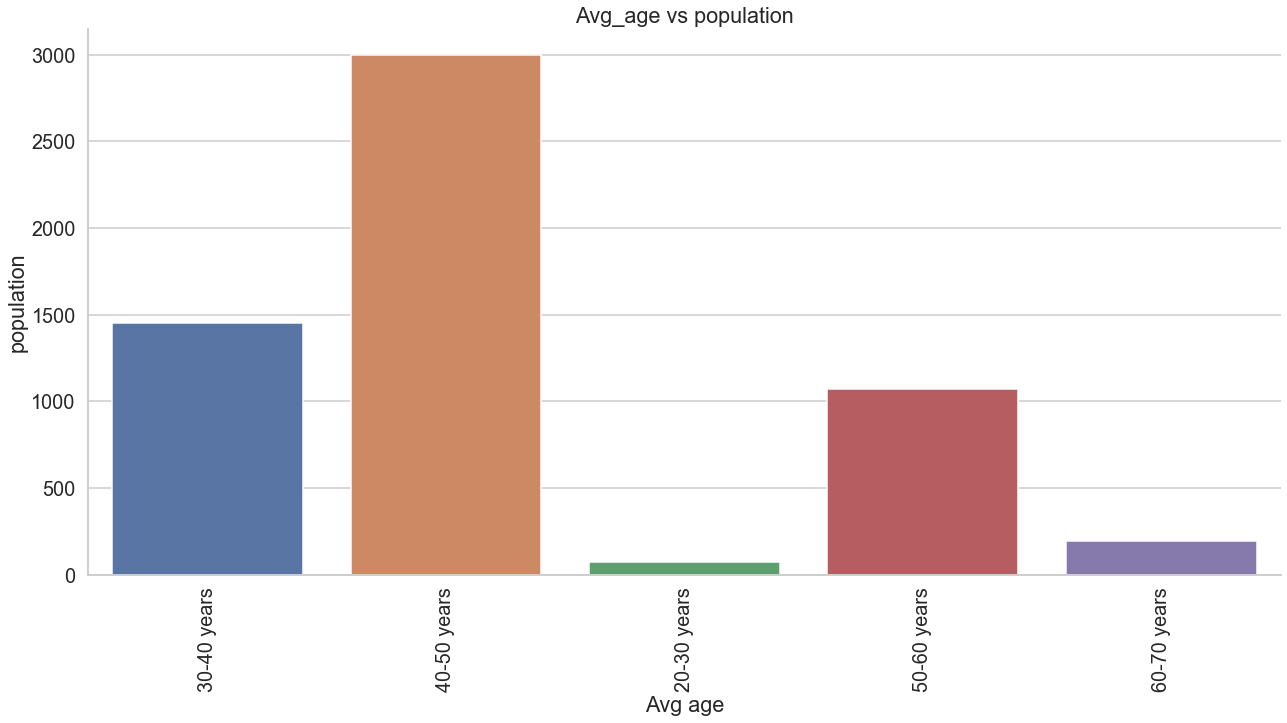

In [188]:
plt.figure(figsize=(20, 12))

p=sns.catplot(x=train["Avg_age"].index, 
            kind="count",
            data=train["Avg_age"],
            height=9,
            aspect=2)
p=p.set(title="Avg_age vs population",xlabel='Avg age',ylabel='population')
p.set_xticklabels(rotation=90)

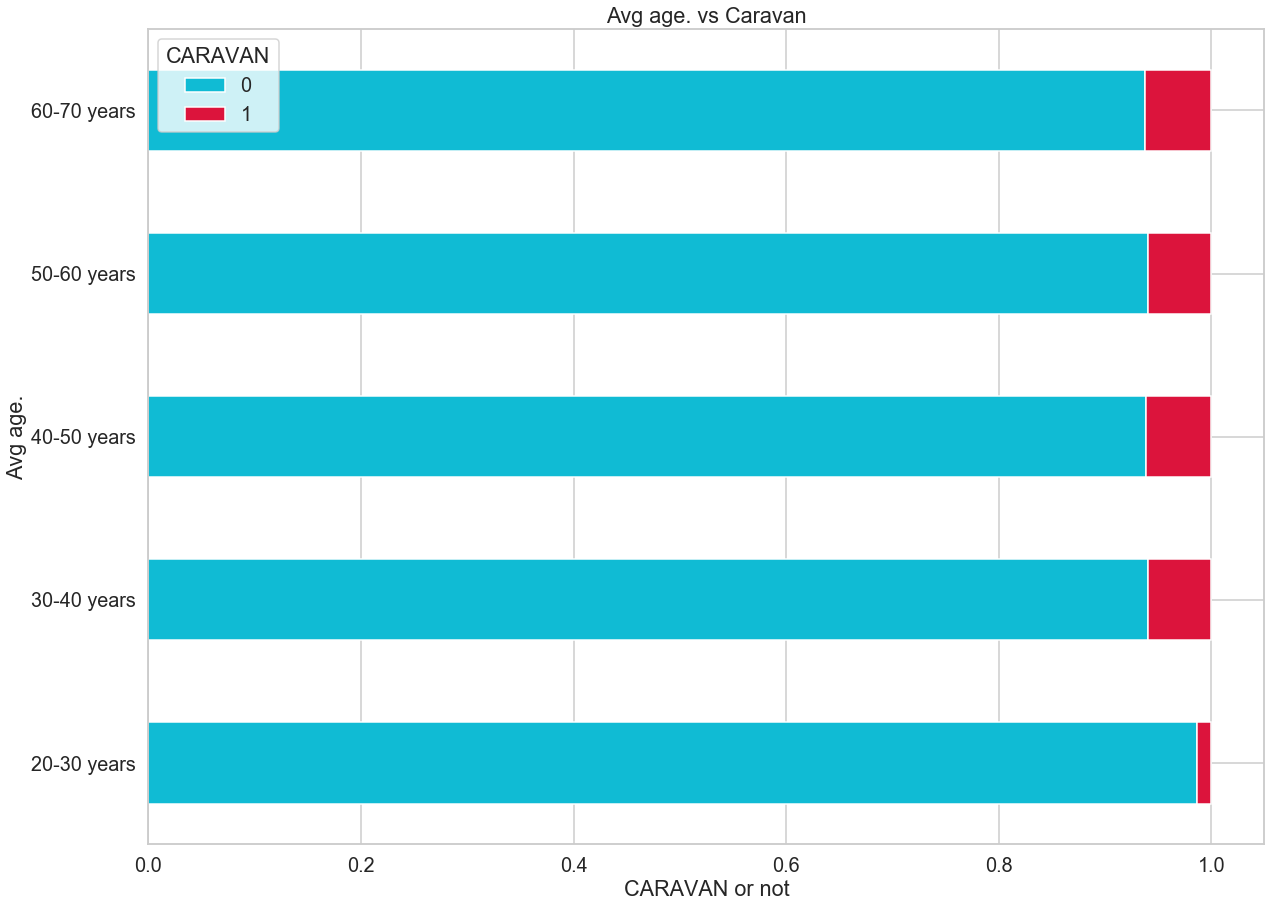

In [189]:
cat = pd.crosstab(train['Avg_age'], train['CARAVAN']);
cat = cat.div(cat.sum(1).astype(float), axis=0);
cat.plot(figsize= (20,15), kind='barh', stacked=True, color=['#10bbd4', 'Crimson'], title='Avg age. vs Caravan', grid=True);
plt.ylabel('Avg age.');
plt.xlabel('CARAVAN or not');

In [190]:
train[train["CARAVAN"]==1]["Avg_age"].value_counts()

40-50 years    183
30-40 years     87
50-60 years     64
60-70 years     12
20-30 years      1
Name: Avg_age, dtype: int64

40-50 Yrs Age group bought most policies whereas 20-30 & 60-70 Age groups  prefered not to buying any Policies

<Figure size 1440x864 with 0 Axes>

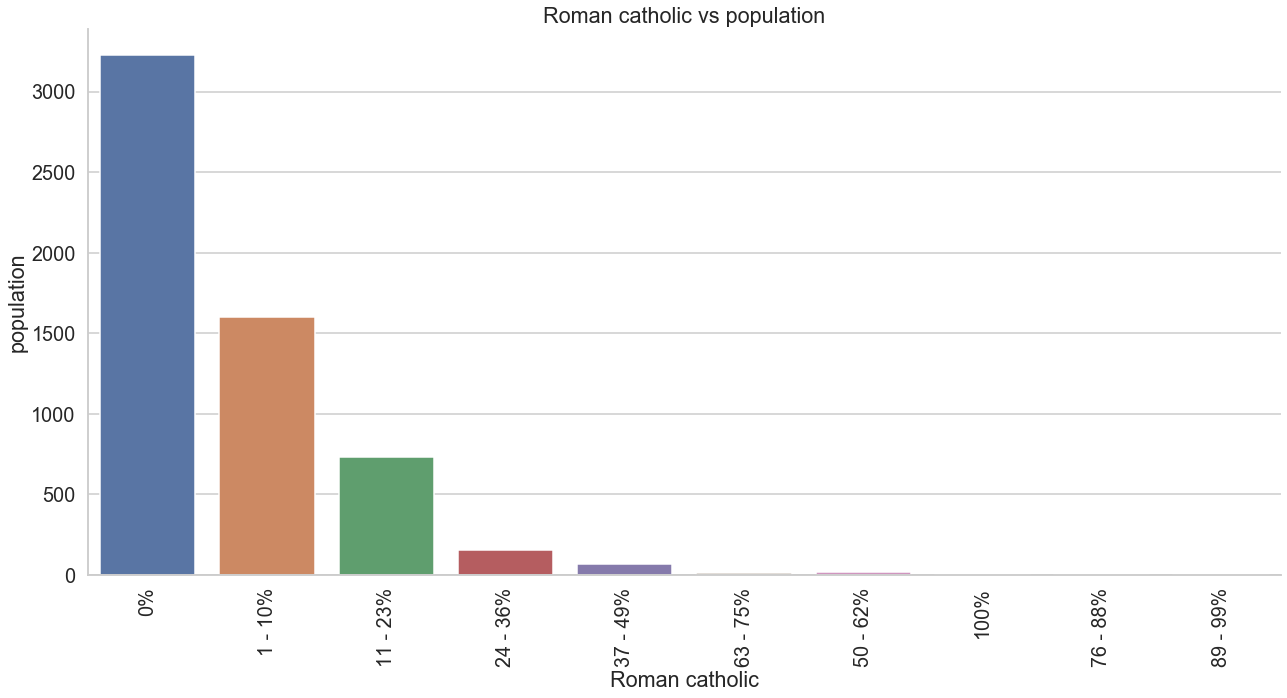

In [191]:
plt.figure(figsize=(20, 12))

p=sns.catplot(x=train["Roman_catholic"].index, 
            kind="count",
            data=train["Roman_catholic"],
            height=9,
            aspect=2)
p=p.set(title="Roman catholic vs population",xlabel='Roman catholic',ylabel='population')
p.set_xticklabels(rotation=90)

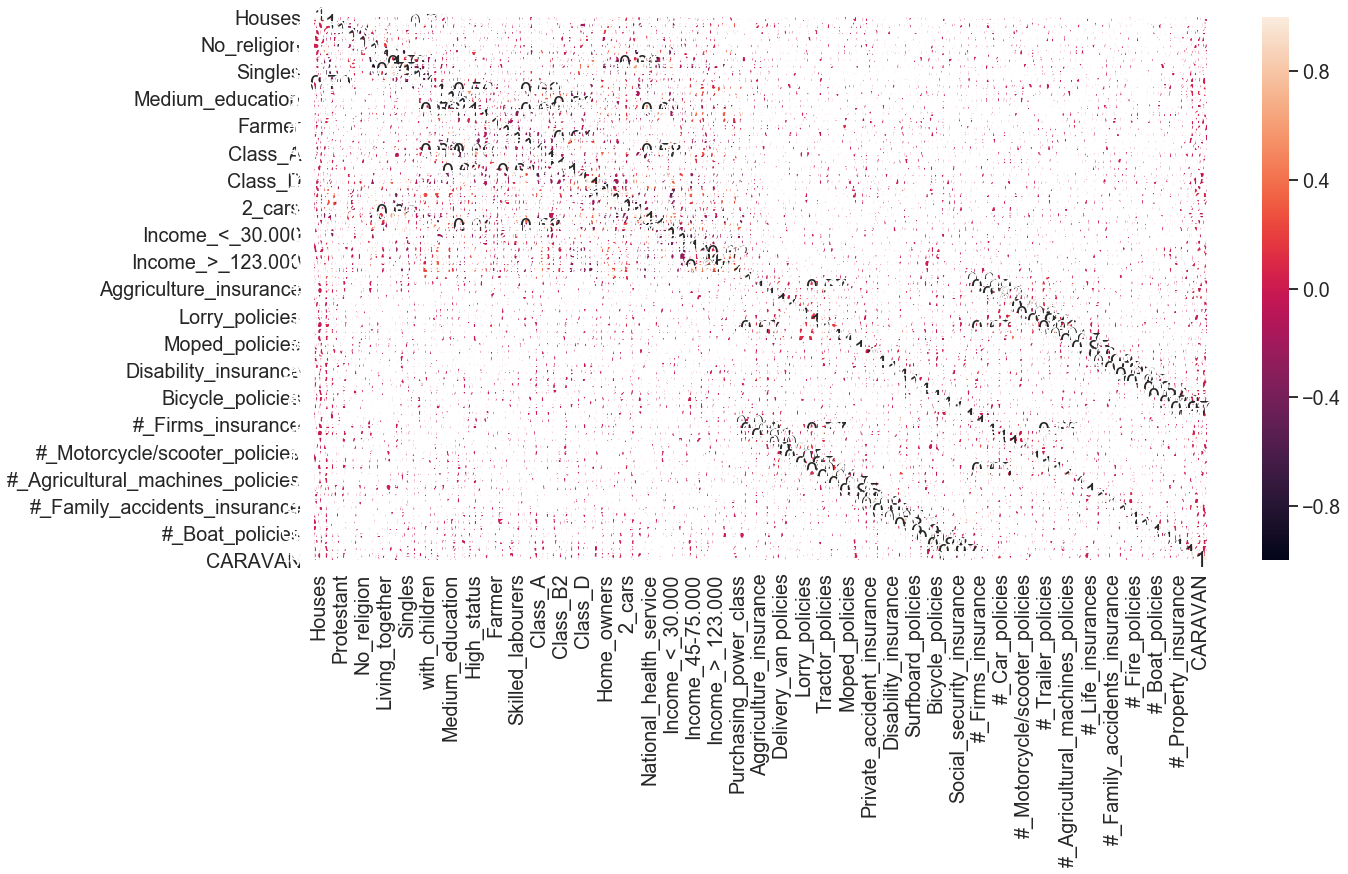

In [192]:
plt.figure(figsize =(20,10))
cor = train.corr()
sns.heatmap(cor,annot=True)
plt.show()

<Figure size 2160x1296 with 0 Axes>

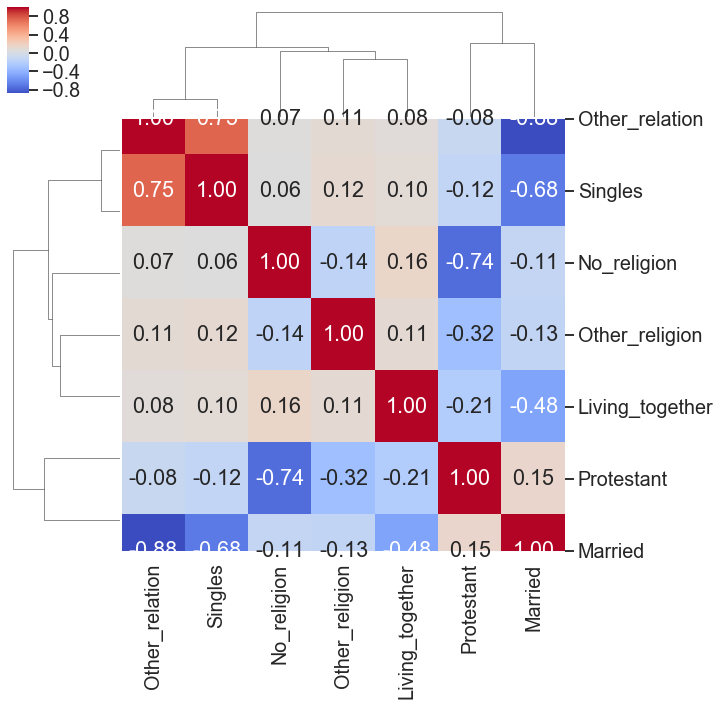

In [193]:
# Correlation matrix between of the 9 features
plt.figure(figsize=(30,18))
sns.clustermap(train.iloc[:,4:13].corr(),annot =True,fmt = ".2f", cmap = "coolwarm")

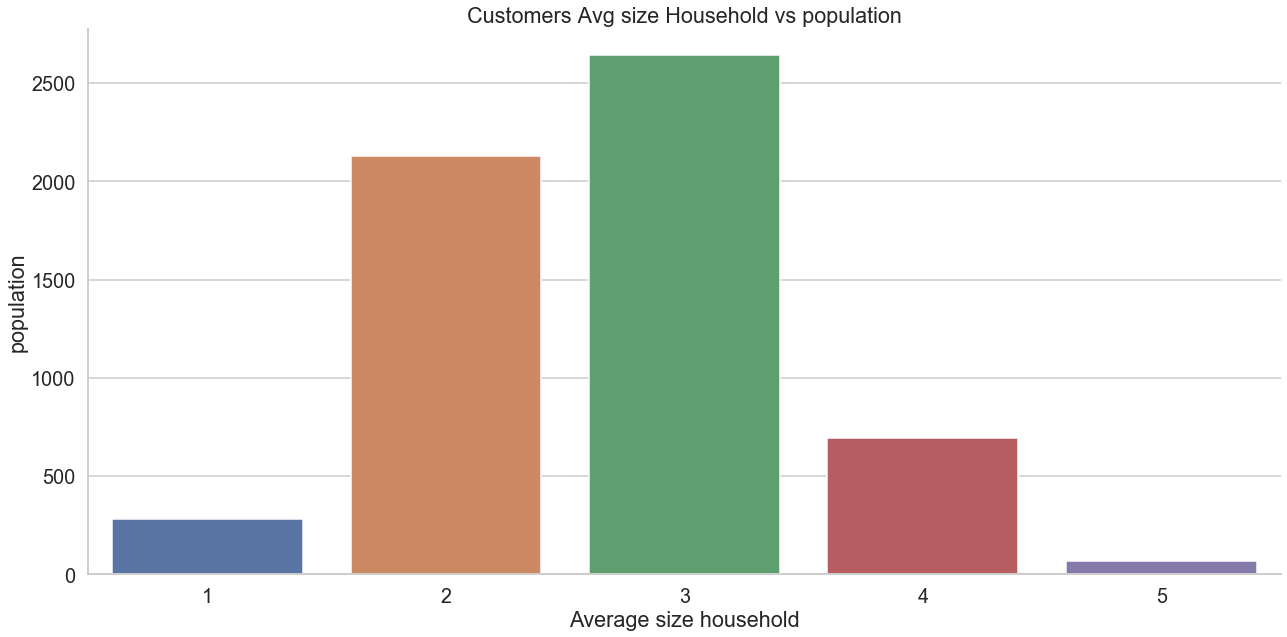

In [194]:
p=sns.catplot(x=train["Avg_size"].index,
             kind="count",
             data=train["Avg_size"],
             height=9,
             aspect=2)
p.set(title="Customers Avg size Household vs population",xlabel='Average size household',ylabel='population')

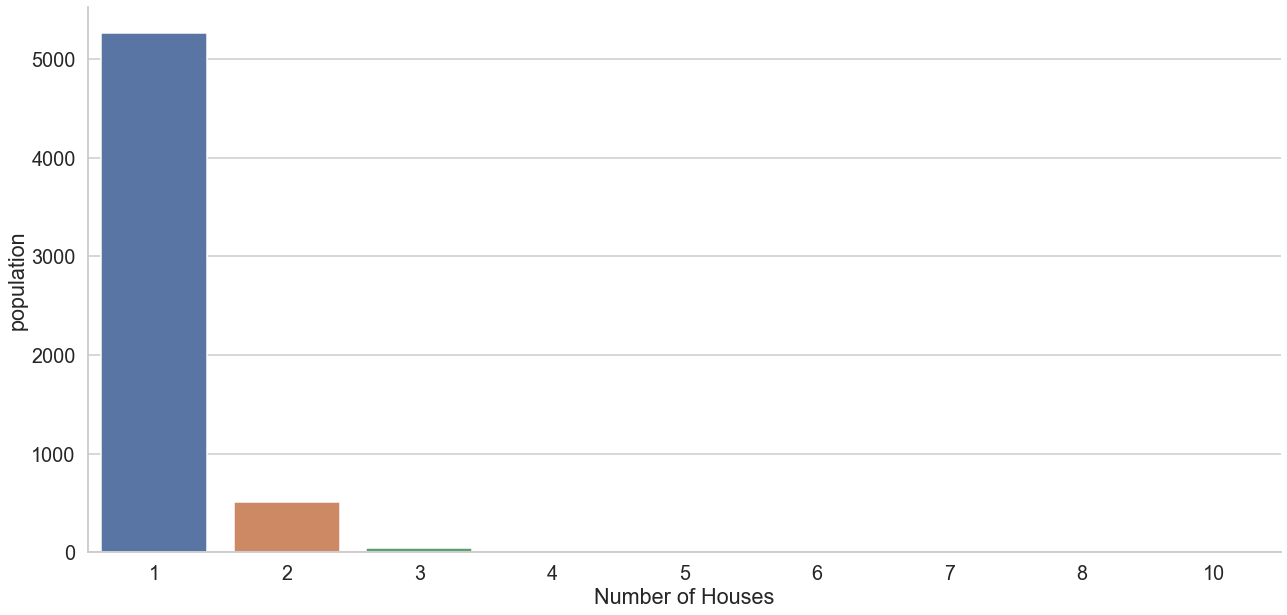

In [195]:
p=sns.catplot(x=train["Houses"].index,
             kind="count",
             data=train["Houses"],
             height=9,
             aspect=2)
p.set(xlabel="Number of Houses", ylabel="population")

In [196]:
train["Houses"].value_counts()

1     5267
2      505
3       39
7        5
4        2
10       1
6        1
5        1
8        1
Name: Houses, dtype: int64

90 % customer has 1 House
8 % customer has 2 House
0.6 % customer has 3 house

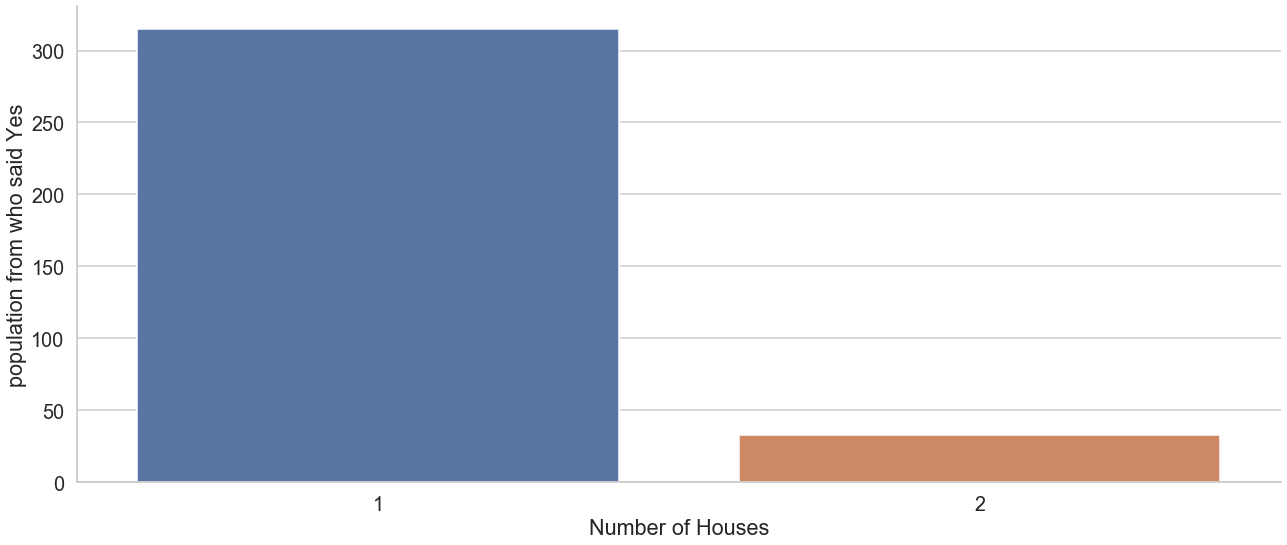

In [197]:
data=train.loc[train["CARAVAN"]==1]

p=sns.catplot(x=data["Houses"].index,
             kind="count",
             data=data["Houses"],
             height=9,
             aspect=2)

p.set(xlabel='Number of Houses', ylabel='population from who said Yes')

[Text(0, 0.5, 'Purchased Caravan Policy'),
 Text(0.5, 0, 'Entrepreneur'),
 Text(0.5, 1.0, 'Purchased Caravan Policy vs Enterpreneur')]

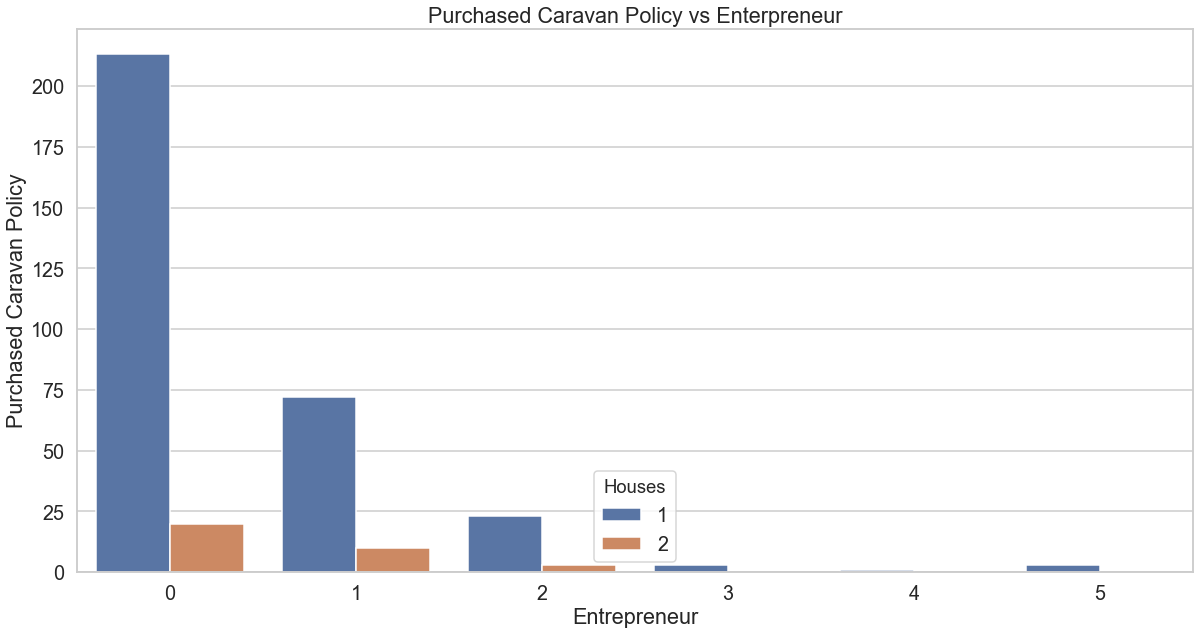

In [198]:
plt.figure(figsize=(20,10))

p = sns.countplot(x = data["Entrepreneur"].index,
                data = data["Entrepreneur"],
                hue = data["Houses"],
                )

p.set(title ="Purchased Caravan Policy vs Enterpreneur",xlabel ="Entrepreneur",ylabel="Purchased Caravan Policy" )


[Text(0, 0.5, 'Purchased Caravan Policy'),
 Text(0.5, 0, 'Farmer'),
 Text(0.5, 1.0, 'Purchased Caravan Policy vs Farmer')]

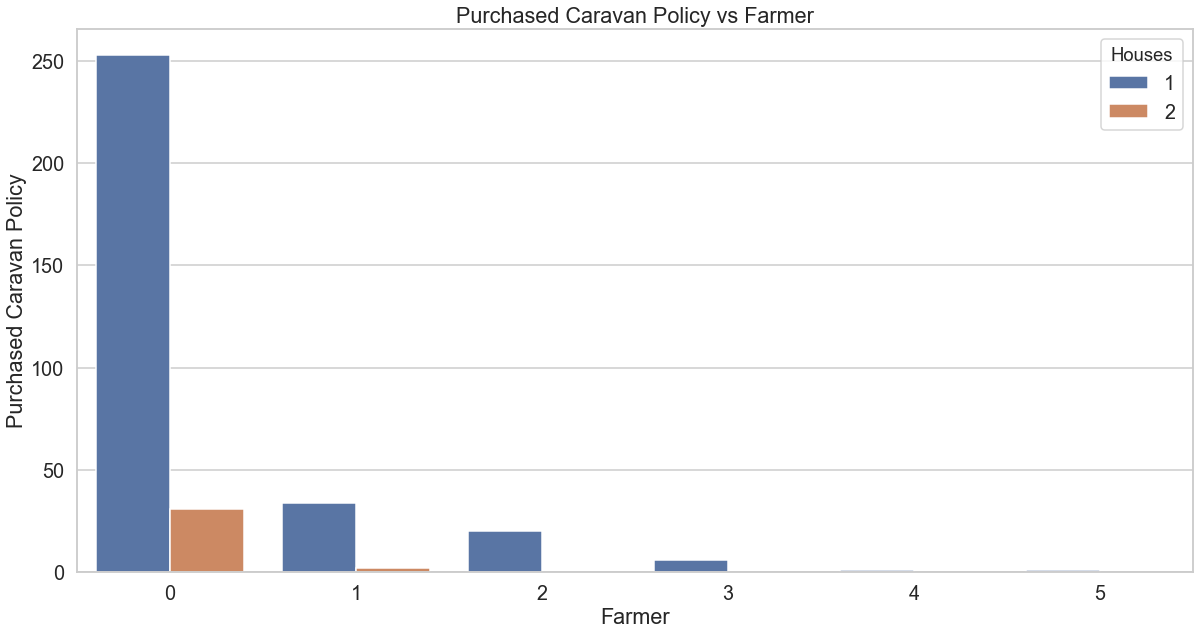

In [199]:
plt.figure(figsize=(20,10))

p = sns.countplot(x = data["Farmer"].index,
                data = data["Farmer"],
                hue = data["Houses"]
                )

p.set(title ="Purchased Caravan Policy vs Farmer",xlabel ="Farmer",ylabel="Purchased Caravan Policy" )


[Text(0, 0.5, 'Purchased Caravan Policy'),
 Text(0.5, 0, 'Middle management'),
 Text(0.5, 1.0, 'Purchased Caravan Policy vs Middle_management')]

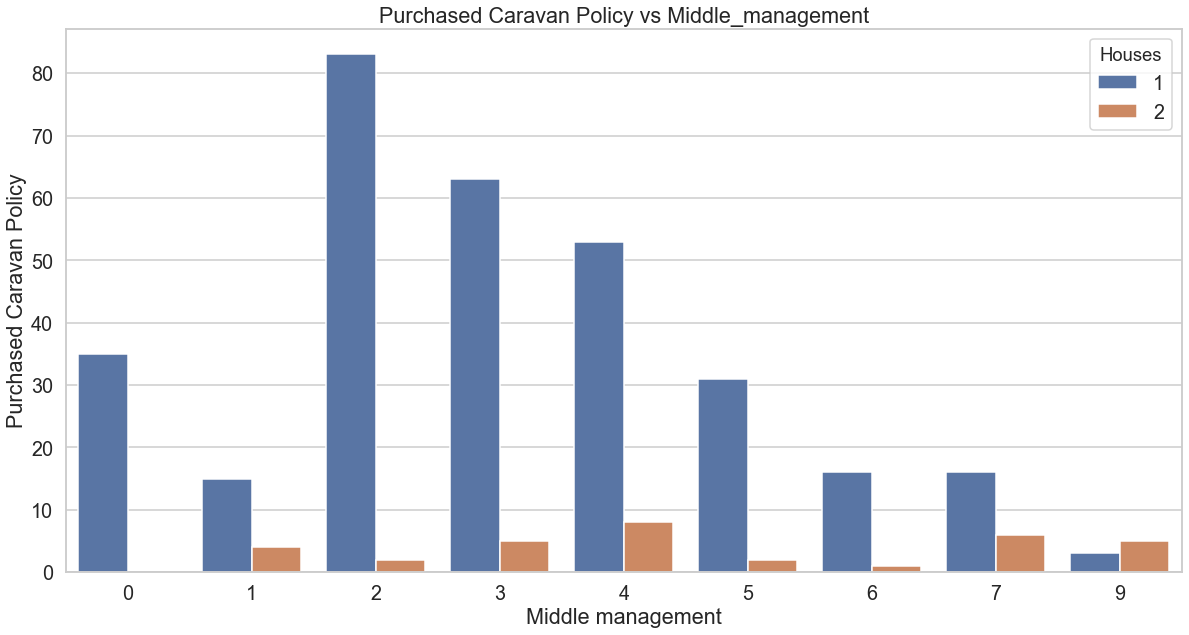

In [200]:
plt.figure(figsize=(20,10))

p = sns.countplot(x = data["Middle_management"].index,
                data = data["Middle_management"],
                hue = data["Houses"]
                )

p.set(title ="Purchased Caravan Policy vs Middle_management",xlabel ="Middle management",ylabel="Purchased Caravan Policy" )

[Text(0, 0.5, 'Purchased Caravan Policy'),
 Text(0.5, 0, 'Skilled labourers'),
 Text(0.5, 1.0, 'Purchased Caravan Policy vs Skilled labourers')]

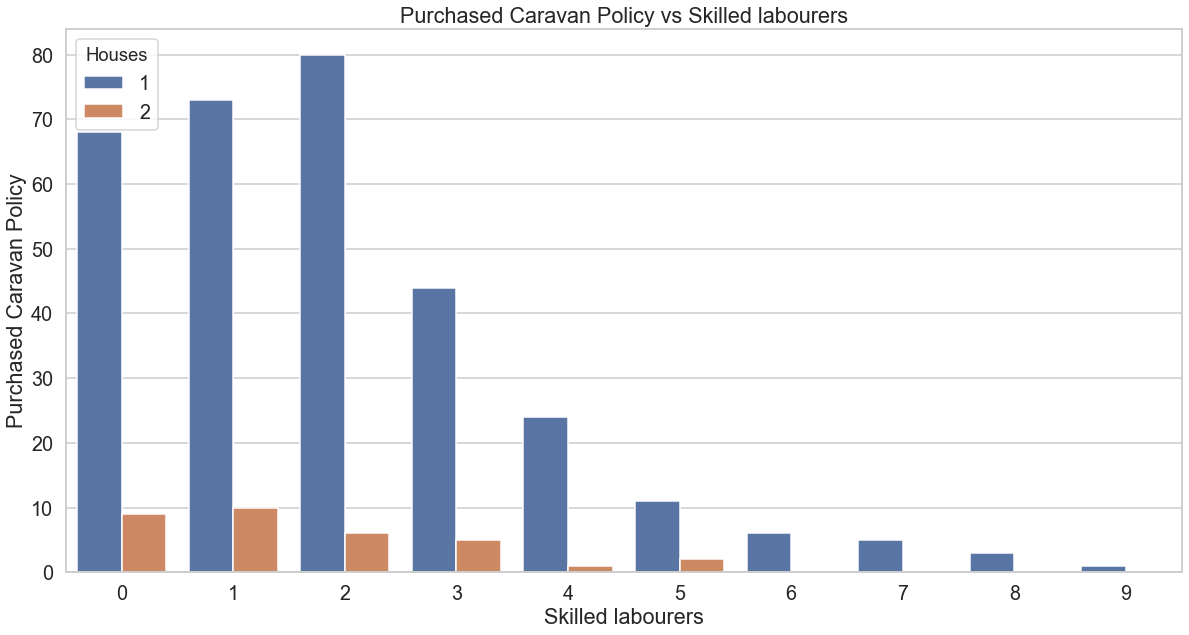

In [201]:

plt.figure(figsize=(20,10))

p = sns.countplot(x = data["Skilled_labourers"].index,
                data = data["Skilled_labourers"],
                hue = data["Houses"],
                )

p.set(title ="Purchased Caravan Policy vs Skilled labourers",xlabel ="Skilled labourers",ylabel="Purchased Caravan Policy" )

[Text(0, 0.5, 'Purchased Caravan Policy'),
 Text(0.5, 0, 'Unskilled labourers'),
 Text(0.5, 1.0, 'Purchased Caravan Policy vs Unskilled labourers')]

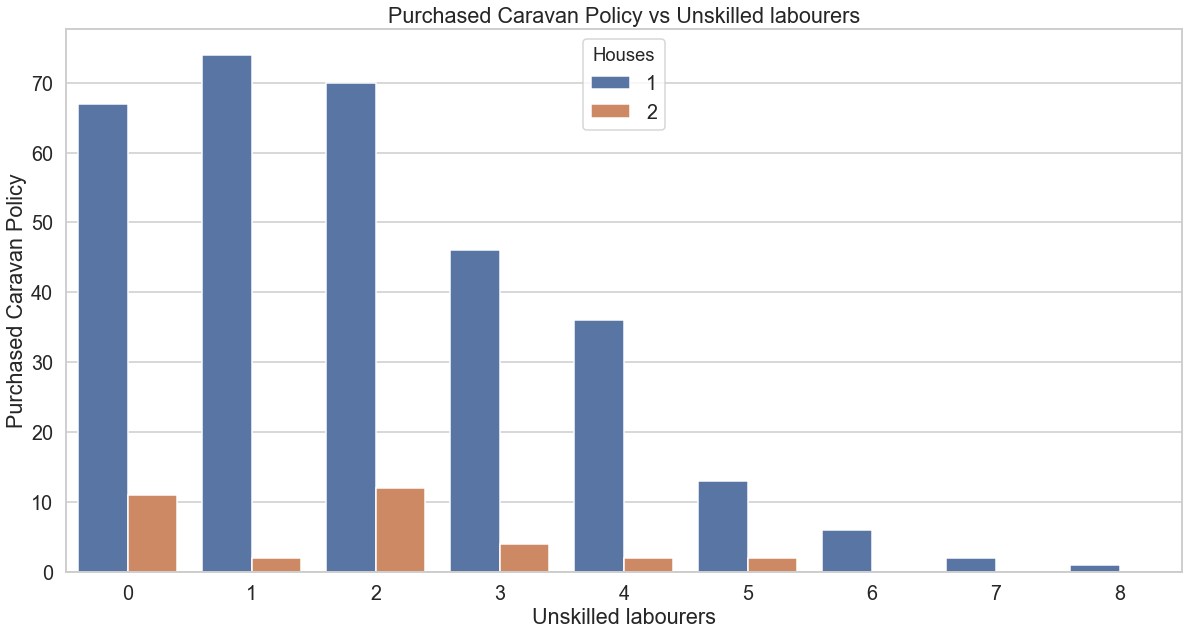

In [202]:
plt.figure(figsize=(20,10))

p = sns.countplot(x = data["Unskilled_labourers"].index,
                data = data["Unskilled_labourers"],
                hue = data["Houses"]
                )

p.set(title ="Purchased Caravan Policy vs Unskilled labourers",xlabel ="Unskilled labourers",ylabel="Purchased Caravan Policy" )

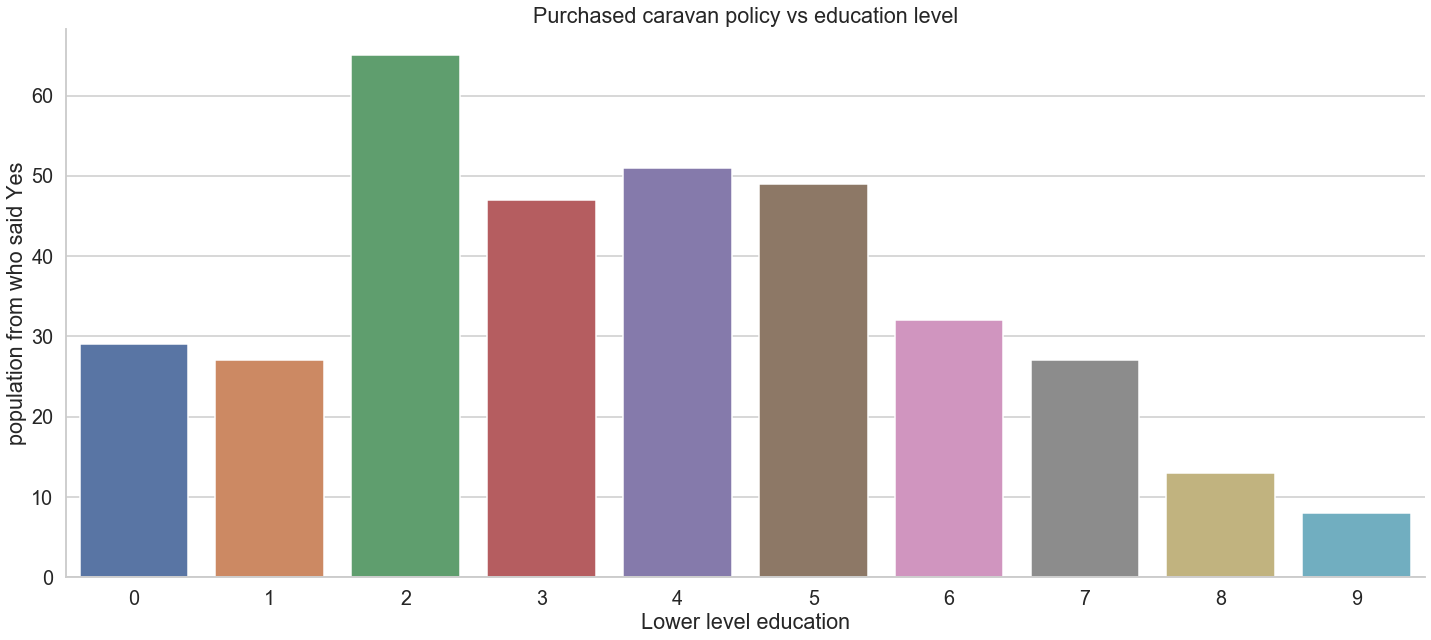

In [203]:
p=sns.catplot(x=data["Lower_education"].index,
              kind="count", 
              data=data["Lower_education"],
              height=10,
              aspect=2)
p.set(title='Purchased caravan policy vs education level',xlabel='Lower level education', ylabel='population from who said Yes')

### Custom function 

In [204]:
def missing_data(df):
    """
    Objective
    ----------
    it shows the missing data in each column with 
    total missing values, percentage of missing value and
    its data type in descending order.
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
    
    returns
    ----------
    missing_data: output data frame(pandas dataframe)
    
    """
    
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round((df.isnull().sum()/df.isnull().count()  * 100).sort_values(ascending=False),2)
    data_type = df.dtypes
    missing_data = pd.concat([total,percent,data_type],axis=1,keys=['Total','Percent','Data_Type']).sort_values("Total", axis = 0, ascending = False)
    
    return missing_data

In [205]:
def plot_missing_data(df,width=15,height=5):
    """
    Objective
    ----------
    Visualize the missing data in pandas data frame 
    yellow means no values present in that cell
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
    width: int , optional
        plot width
    height: int , optional
        plot height
    
    returns
    ----------
    All the light colored columns represents the amount 
    of missing values present in that specific column

    """
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round((df.isnull().sum()/df.isnull().count()  * 100).sort_values(ascending=False),2)
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent']).sort_values("Total", axis = 0, ascending = False)
    
    plt.figure(figsize=(width,height))
    
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="magma")
    plt.xlabel('Columns', fontsize=12)
    plt.title("Missing Value Heatmap", fontsize=18)
    plt.show()
    
    plt.figure(figsize=(width,height))
    
    sns.set(style="whitegrid", color_codes=True) 
    sns.barplot(x = missing_data.index.values , y = 'Percent', data=missing_data) 
    plt.xticks(rotation = 90) 
    plt.ylim(0, 100)
    plt.xlabel('Columns', fontsize=12)
    plt.title("Missing Value Countplot", fontsize=18)
    plt.show()
    

In [206]:
# 6. Missing value treatment

def fill_missing_value(df, columns, method , value = None ):
    """
    Objective
    ----------
    treat the missing value for all columns with mean, mode or custom value
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
    columns: list
        list witch contains all the columns name 
    method : str, options: "mean" , "mode" or "custom"
        pass the missing treatment method
        "mean" will fill the all missing value with mean
        and "mode" with mode values 
        use "custom" method to treat with custome values
    value: str or int (defualt : none)
        pass the custom value if method is "custom"
    returns
    ----------
    data frame
    data frame treated with missing values 
    """
    
    if method =="mean":
        for i in columns:
            df[i].fillna(int(df[i].mean()),inplace=True)
            
        print("[INFO] total {} columns missing values replace with mean".format(len(columns)))
        return df
    elif method == "mode":
        for i in columns:
            df[i].fillna(df[i].mode()[0],inplace=True)
        print("[INFO] total {} columns missing values replace with mode".format(len(columns)))
        return df
    
    elif method == "custom":
        for i in columns:
            df[i].fillna(value=value,inplace=True)
        print("[INFO] total {} columns missing values replace with {}".format(len(columns),value))
        return df


In [207]:
def drop_duplicates(df):
    """
    Objective
    ----------
    Drop duplicates rows in data frame except for the first occurrence.
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
        
    returns
    ----------
    dataframe with all unique rows
    """
        
    try:
        dr = df.duplicated().value_counts()[1]
        print("[INFO] Dropping {} duplicates records...".format(dr))
        f_df = df.drop_duplicates(keep="first")
        
        return f_df
    except KeyError:
        print("[INFO] No duplicates records found")
        return df
    


In [208]:
def label_split(df, label_name):
    """
    Objective
    ----------
    split dependent and independent varibles in dataframe
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 

    label_name : str
        name of dependent variable (y)

    returns 
    ----------
    X: pandas dataframe 
        dataframe with all independent features
    y: pandas series
        dependent variable with 1D       
    
    """
    
    X = df.loc[: , df.columns != label_name]
    y = df[label_name]
    
    return X , y

In [209]:
def data_partition(df, label_name, test_size=0.33, random_state=None):
    """
    Objective
    ----------
    split data frame into random train and test subsets 
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 

    label_name : str
        name of dependent variable (y)
        
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples.
    
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;

    returns 
    ----------
     X_train, X_test, y_train, y_test
        train test split of the data frame
    
    """
    X , y =  label_split(df, label_name)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    print("[INFO] data splited into train and test")
    print()
    print("dataframe shape {}".format(df.shape))
    print()
    print("X_train shape : {}".format(X_train.shape))
    print("X_test shape : {}".format(X_test.shape))
    print("y_train shape : {}".format(y_train.shape))
    print("y_test shape : {}".format(y_test.shape))
    return X_train, X_test, y_train, y_test
    
          

In [210]:
def feature_scaling(X_train, X_test, return_df = False):
  
        mm_scaler = MinMaxScaler()
        
        if return_df:
        
            # return data frame format
            X_train_scale = pd.DataFrame(mm_scaler.fit_transform(X_train),columns=X_train.columns)
            X_test_scale = pd.DataFrame(mm_scaler.transform(X_test),columns=X_test.columns)

            return X_train_scale , X_test_scale
        else:
            
            # return array format
            X_train_scale =mm_scaler.fit_transform(X_train)
            X_test_scale =mm_scaler.transform(X_test)
            
            return X_train_scale , X_test_scale,  mm_scaler


In [211]:
def plot_confusion_metrix(y_true, y_pred,classes,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    Objective
    ----------
    plot confussion matrix, classification report and accuracy score
    
    parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    classes : list
        List of labels to index the matrix
        
    title : title for matrix
    cmap : colormap for matrix 
    
    returns 
    ----------
   all accruacy matrix 
    """
    
    
    cm = confusion_matrix(y_true,y_pred)
    
    

    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    thresh = cm.max() /2
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], 'd'),
                 horizontalalignment='center',verticalalignment='top',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    
    print("-----------------------------------------------------")
    print('Classification report')
    print(classification_report(y_true,y_pred))
    
    acc= accuracy_score(y_true,y_pred)
    print("Accuracy of the model: ", acc)

In [212]:
# read data
train = pd.read_table("DATA/caravan.train",names=new_cols)
test = pd.read_table("DATA/caravan.test",names=new_cols[:-1])

### Check missing data

In [213]:
missing_data(train)

,Total,Percent,Data_Type
#_Aggriculture_insurance,0,0.0,int64
Income_>_123.000,0,0.0,int64
Moped_policies,0,0.0,int64
Middle_management,0,0.0,int64
Medium_education,0,0.0,int64
...,...,...,...
Avg_size,0,0.0,int64
Avg_age,0,0.0,int64
Average_income,0,0.0,int64
Agricultural_machines_policies,0,0.0,int64


In [214]:
missing_data(test)

,Total,Percent,Data_Type
#_Aggriculture_insurance,0,0.0,int64
Life_insurances,0,0.0,int64
Motorcycle/scooter_policies,0,0.0,int64
Moped_policies,0,0.0,int64
Middle_management,0,0.0,int64
...,...,...,...
Avg_size,0,0.0,int64
Avg_age,0,0.0,int64
Average_income,0,0.0,int64
Agricultural_machines_policies,0,0.0,int64


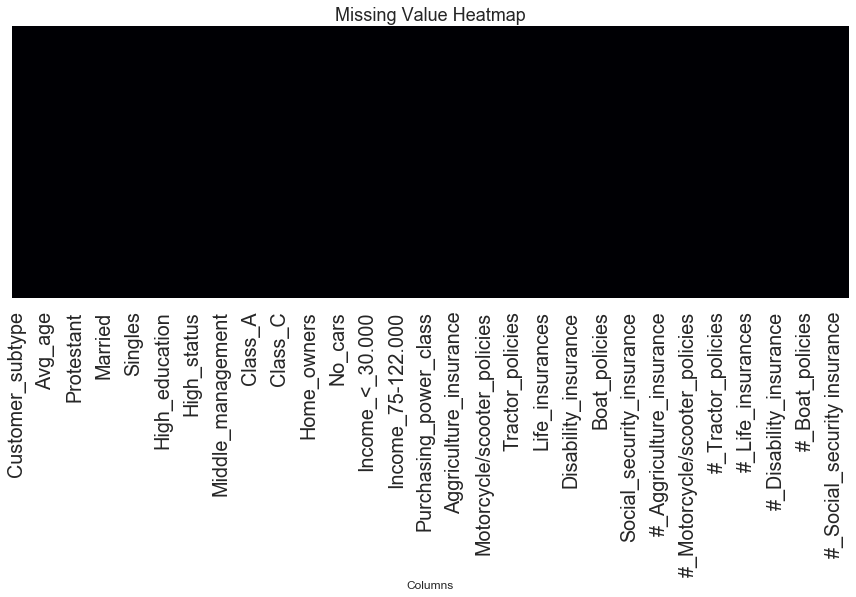

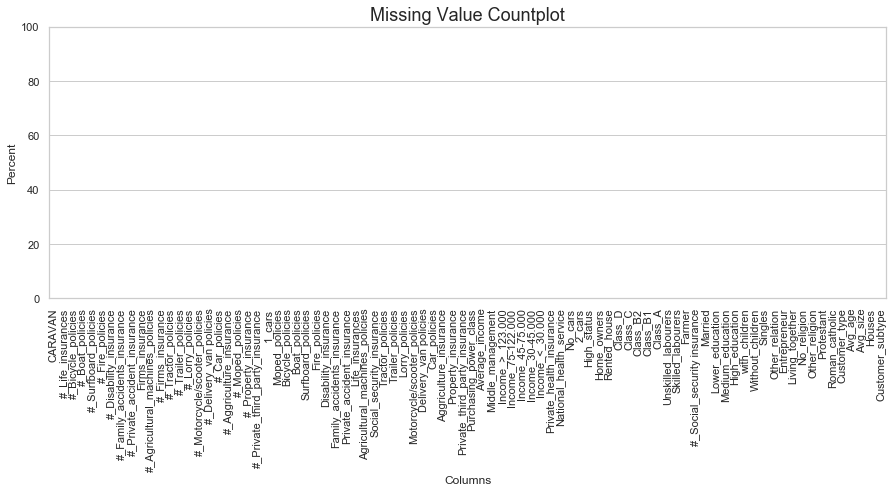

In [215]:
plot_missing_data(train)

In [216]:
# treat missing data
train = fill_missing_value(train,["Avg_age"],"mode") # with mode

[INFO] total 1 columns missing values replace with mode


### Check for duplicates 

In [217]:
train = drop_duplicates(train)

[INFO] Dropping 602 duplicates records...


In [218]:
test = drop_duplicates(test)

[INFO] Dropping 307 duplicates records...


### Data Prtition

In [219]:
X_train, X_test, y_train, y_test = data_partition(df= train, label_name="CARAVAN", test_size=0.30)

[INFO] data splited into train and test

dataframe shape (5220, 86)

X_train shape : (3654, 85)
X_test shape : (1566, 85)
y_train shape : (3654,)
y_test shape : (1566,)


In [220]:
y_train.value_counts() # we have 235 observation for class 1 in training dataset

0    3416
1     238
Name: CARAVAN, dtype: int64

In [221]:
y_test.value_counts() # we have 105 observation for class 1 in testing dataset

0    1464
1     102
Name: CARAVAN, dtype: int64

In [222]:
# Feature scaling 
X_train_scale , X_test_scale = feature_scaling(X_train, X_test, return_df = True)

In [223]:
X_train_scale.head(10) # this is dataframe format but for model we will use array format

,Customer_subtype,Houses,Avg_size,Avg_age,Customer_type,Roman_catholic,Protestant,Other_religion,No_religion,Married,Living_together,Other_relation,Singles,Without_children,with_children,High_education,Medium_education,Lower_education,High_status,Entrepreneur,Farmer,Middle_management,Skilled_labourers,Unskilled_labourers,Class_A,Class_B1,Class_B2,Class_C,Class_D,Rented_house,Home_owners,1_cars,2_cars,No_cars,National_health_service,Private_health_insurance,Income_<_30.000,Income_30-45.000,Income_45-75.000,Income_75-122.000,Income_>_123.000,Average_income,Purchasing_power_class,Private_third_party_insurance,Firms_insurance,Aggriculture_insurance,Car_policies,Delivery_van policies,Motorcycle/scooter_policies,Lorry_policies,Trailer_policies,Tractor_policies,Agricultural_machines_policies,Moped_policies,Life_insurances,Private_accident_insurance,Family_accidents_insurance,Disability_insurance,Fire_policies,Surfboard_policies,Boat_policies,Bicycle_policies,Property_insurance,Social_security_insurance,#_Private_third_party_insurance,#_Firms_insurance,#_Aggriculture_insurance,#_Car_policies,#_Delivery_van policies,#_Motorcycle/scooter_policies,#_Lorry_policies,#_Trailer_policies,#_Tractor_policies,#_Agricultural_machines_policies,#_Moped_policies,#_Life_insurances,#_Private_accident_insurance,#_Family_accidents_insurance,#_Disability_insurance,#_Fire_policies,#_Surfboard_policies,#_Boat_policies,#_Bicycle_policies,#_Property_insurance,#_Social_security insurance
0,0.100,0.0,0.25,0.4,0.000000,0.000000,0.333333,0.6,0.555556,1.000000,0.000000,0.000000,0.333333,0.555556,0.222222,0.222222,0.444444,0.333333,0.000000,0.0,0.000000,0.444444,0.333333,0.333333,0.000000,0.333333,0.111111,0.444444,0.285714,0.222222,0.777778,0.777778,0.000000,0.222222,0.444444,0.555556,0.000000,0.333333,0.333333,0.333333,0.000000,0.666667,0.285714,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.825,0.0,0.25,0.4,0.777778,0.111111,0.444444,0.2,0.444444,0.777778,0.142857,0.222222,0.444444,0.444444,0.222222,0.000000,0.333333,0.666667,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.333333,0.111111,0.555556,0.142857,0.777778,0.222222,0.666667,0.333333,0.111111,0.555556,0.444444,0.555556,0.333333,0.111111,0.000000,0.000000,0.333333,0.714286,0.666667,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.571429,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.142857,0.0,0.0,0.000000,0.0,0.0
2,0.925,0.0,0.50,0.4,0.888889,0.000000,0.777778,0.2,0.222222,0.777778,0.000000,0.222222,0.222222,0.222222,0.666667,0.111111,0.555556,0.444444,0.333333,0.0,0.222222,0.222222,0.333333,0.111111,0.222222,0.111111,0.333333,0.333333,0.142857,0.222222,0.777778,0.666667,0.333333,0.111111,0.555556,0.444444,0.222222,0.444444,0.444444,0.111111,0.000000,0.444444,0.428571,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.775,0.0,0.50,0.4,0.666667,0.111111,0.555556,0.2,0.333333,0.555556,0.142857,0.333333,0.333333,0.222222,0.444444,0.222222,0.333333,0.555556,0.222222,0.2,0.000000,0.333333,0.222222,0.333333,0.222222,0.222222,0.222222,0.333333,0.285714,0.555556,0.444444,0.444444,0.333333,0.444444,0.777778,0.222222,0.333333,0.555556,0.111111,0.111111,0.000000,0.333333,0.000000,0.000000,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0
4,0.925,0.0,0.25,0.6,0.888889,0.111111,0.555556,0.4,0.111111,0.666667,0.142857,0.333333,0.333333,0.444444,0.333333,0.222222,0.555556,0.333333,0.222222,0.0,0.000000,0.555556,0.111111,0.222222,0.111111,0.222222,0.222222,0.444444,0.142857,0.777778,0.222222,0.555556,0.166

In [224]:
# Feature scaling 
X_train_scale , X_test_scale ,mm_scaler = feature_scaling(X_train, X_test, return_df = False)

In [225]:
X_train_scale

array([[0.1  , 0.   , 0.25 , ..., 0.   , 0.   , 0.   ],
       [0.825, 0.   , 0.25 , ..., 0.   , 0.   , 0.   ],
       [0.925, 0.   , 0.5  , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.85 , 0.   , 0.5  , ..., 0.   , 0.   , 0.   ],
       [0.95 , 0.   , 0.5  , ..., 0.   , 0.   , 0.   ],
       [0.1  , 0.   , 0.25 , ..., 0.   , 0.   , 0.   ]])

### Deep Learning Model 

#### Unblanced Dataset

In [226]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 85, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 85))


# Adding the second hidden layer 
classifier.add(Dense(units=39, kernel_initializer='uniform',
                     activation='relu'))

# dropout for second layer 
classifier.add(Dropout(0.1))

# Adding the third hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))


# Adding the output layer 
classifier.add(Dense(units=1, kernel_initializer='uniform',
                     activation='sigmoid'))

In [227]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [228]:
# Fitting the ANN to the Training set
classifier.fit(X_train_scale,y_train, batch_size = 24, epochs = 200)

Train on 3654 samples
Epoch 1/200
3654/3654 [==============================] - 1s 353us/sample - loss: 0.3411 - accuracy: 0.9313
Epoch 2/200
3654/3654 [==============================] - 1s 168us/sample - loss: 0.2331 - accuracy: 0.9349
Epoch 3/200
3654/3654 [==============================] - 1s 172us/sample - loss: 0.2263 - accuracy: 0.9349
Epoch 4/200
3654/3654 [==============================] - 1s 169us/sample - loss: 0.2219 - accuracy: 0.9349
Epoch 5/200
3654/3654 [==============================] - 1s 179us/sample - loss: 0.2188 - accuracy: 0.9349
Epoch 6/200
3654/3654 [==============================] - 1s 172us/sample - loss: 0.2165 - accuracy: 0.9349
Epoch 7/200
3654/3654 [==============================] - 1s 168us/sample - loss: 0.2174 - accuracy: 0.9349
Epoch 8/200
3654/3654 [==============================] - 1s 172us/sample - loss: 0.2172 - accuracy: 0.9349
Epoch 9/200
3654/3654 [==============================] - 1s 172us/sample - loss: 0.2133 - accuracy: 0.9349
Epoch 10/200
36

3654/3654 [==============================] - 1s 165us/sample - loss: 0.1176 - accuracy: 0.9507
Epoch 77/200
3654/3654 [==============================] - 1s 159us/sample - loss: 0.1128 - accuracy: 0.9516
Epoch 78/200
3654/3654 [==============================] - 1s 166us/sample - loss: 0.1108 - accuracy: 0.9551
Epoch 79/200
3654/3654 [==============================] - 1s 161us/sample - loss: 0.1099 - accuracy: 0.9543
Epoch 80/200
3654/3654 [==============================] - 1s 164us/sample - loss: 0.1131 - accuracy: 0.9516
Epoch 81/200
3654/3654 [==============================] - 1s 168us/sample - loss: 0.1094 - accuracy: 0.9507
Epoch 82/200
3654/3654 [==============================] - 1s 171us/sample - loss: 0.1030 - accuracy: 0.9548
Epoch 83/200
3654/3654 [==============================] - 1s 165us/sample - loss: 0.1021 - accuracy: 0.9557
Epoch 84/200
3654/3654 [==============================] - 1s 164us/sample - loss: 0.1065 - accuracy: 0.9562
Epoch 85/200
3654/3654 [=================

3654/3654 [==============================] - 1s 159us/sample - loss: 0.0488 - accuracy: 0.9797
Epoch 151/200
3654/3654 [==============================] - 1s 152us/sample - loss: 0.0565 - accuracy: 0.9770
Epoch 152/200
3654/3654 [==============================] - 1s 146us/sample - loss: 0.0554 - accuracy: 0.9745
Epoch 153/200
3654/3654 [==============================] - 1s 149us/sample - loss: 0.0531 - accuracy: 0.9770
Epoch 154/200
3654/3654 [==============================] - 1s 163us/sample - loss: 0.0493 - accuracy: 0.9778
Epoch 155/200
3654/3654 [==============================] - 1s 157us/sample - loss: 0.0546 - accuracy: 0.9762
Epoch 156/200
3654/3654 [==============================] - 1s 163us/sample - loss: 0.0522 - accuracy: 0.9756
Epoch 157/200
3654/3654 [==============================] - 1s 166us/sample - loss: 0.0481 - accuracy: 0.9789
Epoch 158/200
3654/3654 [==============================] - 1s 164us/sample - loss: 0.0502 - accuracy: 0.9756
Epoch 159/200
3654/3654 [========

In [229]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_scale)

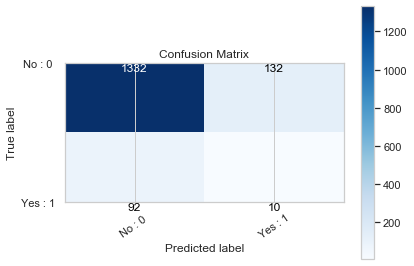

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1464
           1       0.07      0.10      0.08       102

    accuracy                           0.86      1566
   macro avg       0.50      0.50      0.50      1566
weighted avg       0.88      0.86      0.87      1566

Accuracy of the model:  0.8569604086845466


In [230]:
# Plot confusion Matrix

label = ["No : 0 ", "Yes : 1"]
plot_confusion_metrix(y_test, Y_pred,label)

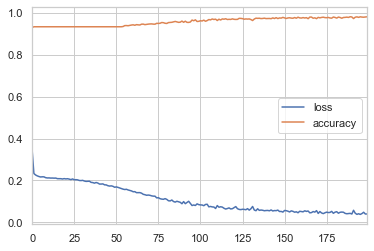

In [231]:
model_loss = pd.DataFrame(classifier.history.history)
model_loss.plot()

#### Balanced Data set

In [232]:
from imblearn.over_sampling import SMOTE

In [233]:
x_resample, y_resample = SMOTE().fit_sample(X_train_scale,y_train)

In [234]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 85, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 85))


# Adding the second hidden layer 
classifier.add(Dense(units=39, kernel_initializer='uniform',
                     activation='relu'))

# dropout for second layer 
classifier.add(Dropout(0.1))

# Adding the third hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))


# Adding the output layer 
classifier.add(Dense(units=1, kernel_initializer='uniform',
                     activation='sigmoid'))

In [235]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [236]:
# Fitting the ANN to the Training set
classifier.fit(x_resample, y_resample, epochs = 50)

Train on 6832 samples
Epoch 1/50
6832/6832 [==============================] - 2s 251us/sample - loss: 0.6343 - accuracy: 0.6284
Epoch 2/50
6832/6832 [==============================] - 1s 115us/sample - loss: 0.5583 - accuracy: 0.7194
Epoch 3/50
6832/6832 [==============================] - 1s 119us/sample - loss: 0.5225 - accuracy: 0.7440
Epoch 4/50
6832/6832 [==============================] - 1s 133us/sample - loss: 0.4645 - accuracy: 0.7781
Epoch 5/50
6832/6832 [==============================] - 1s 128us/sample - loss: 0.4047 - accuracy: 0.8246
Epoch 6/50
6832/6832 [==============================] - 1s 132us/sample - loss: 0.3519 - accuracy: 0.8552
Epoch 7/50
6832/6832 [==============================] - 1s 131us/sample - loss: 0.3113 - accuracy: 0.8740
Epoch 8/50
6832/6832 [==============================] - 1s 132us/sample - loss: 0.2917 - accuracy: 0.8844
Epoch 9/50
6832/6832 [==============================] - 1s 127us/sample - loss: 0.2643 - accuracy: 0.8952
Epoch 10/50
6832/6832 [=

In [237]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_scale)

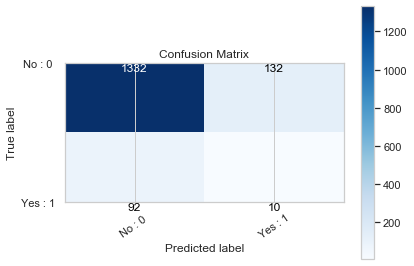

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1464
           1       0.07      0.10      0.08       102

    accuracy                           0.86      1566
   macro avg       0.50      0.50      0.50      1566
weighted avg       0.88      0.86      0.87      1566

Accuracy of the model:  0.8569604086845466


In [238]:
# Plot confusion Matrix

label = ["No : 0 ", "Yes : 1"]
plot_confusion_metrix(y_test, Y_pred,label)

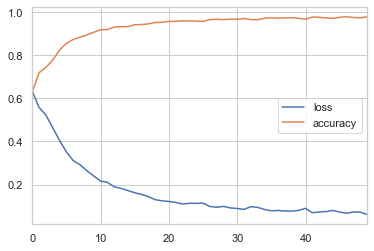

In [239]:
model_loss = pd.DataFrame(classifier.history.history)
model_loss.plot()

### Logistic Regression

In [240]:
# Logisitc Regression Model

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

# fitting training data to the model
classifier.fit(X_train_scale, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [241]:
y_pred = classifier.predict(X_test_scale)

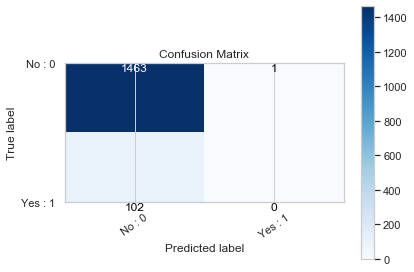

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1464
           1       0.00      0.00      0.00       102

    accuracy                           0.93      1566
   macro avg       0.47      0.50      0.48      1566
weighted avg       0.87      0.93      0.90      1566

Accuracy of the model:  0.934227330779055


In [242]:
# Plot confusion Matrix

label = ["No : 0","Yes : 1"]
plot_confusion_metrix(y_test,y_pred,label)

# Tunnig the model

In [243]:
# store the predicted probabilities
# aadusting the threshold levle for probablites 

y_pred_prob = classifier.predict_proba(X_test_scale)
print("       class : 0     class: 1  ")
y_pred_prob

       class : 0     class: 1  


array([[0.90455331, 0.09544669],
       [0.96829908, 0.03170092],
       [0.97015061, 0.02984939],
       ...,
       [0.96303614, 0.03696386],
       [0.96225213, 0.03774787],
       [0.98153279, 0.01846721]])

In [244]:
y_pred_class = []

for value in y_pred_prob[:,1]:
    if value > 0.60:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
          

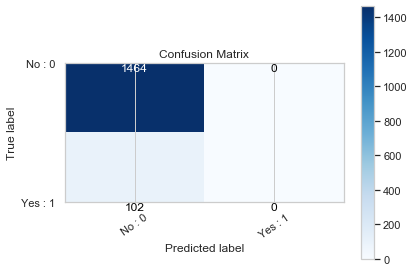

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1464
           1       0.00      0.00      0.00       102

    accuracy                           0.93      1566
   macro avg       0.47      0.50      0.48      1566
weighted avg       0.87      0.93      0.90      1566

Accuracy of the model:  0.9348659003831418


In [245]:
label = ["No : 0","Yes : 1"]
plot_confusion_metrix(y_test,y_pred_class,label)

In [246]:
for a in np.arange(0,1,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 => ", 
        cfm[1,0]," , type 1 => ", cfm[0,1])

Errors at threshold  0.0 : 1464  , type 2 =>  0  , type 1 =>  1464
Errors at threshold  0.01 : 1371  , type 2 =>  0  , type 1 =>  1371
Errors at threshold  0.02 : 1161  , type 2 =>  3  , type 1 =>  1158
Errors at threshold  0.03 : 948  , type 2 =>  6  , type 1 =>  942
Errors at threshold  0.04 : 795  , type 2 =>  15  , type 1 =>  780
Errors at threshold  0.05 : 695  , type 2 =>  22  , type 1 =>  673
Errors at threshold  0.06 : 581  , type 2 =>  27  , type 1 =>  554
Errors at threshold  0.07 : 501  , type 2 =>  38  , type 1 =>  463
Errors at threshold  0.08 : 432  , type 2 =>  44  , type 1 =>  388
Errors at threshold  0.09 : 378  , type 2 =>  50  , type 1 =>  328
Errors at threshold  0.1 : 341  , type 2 =>  56  , type 1 =>  285
Errors at threshold  0.11 : 296  , type 2 =>  60  , type 1 =>  236
Errors at threshold  0.12 : 266  , type 2 =>  64  , type 1 =>  202
Errors at threshold  0.13 : 237  , type 2 =>  71  , type 1 =>  166
Errors at threshold  0.14 : 211  , type 2 =>  73  , type 1 => 

### KNN

In [247]:
# Classify with K-NN.
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

model.fit(X_train_scale, y_train)

# Make predictions based on our best model.
y_pred = model.predict(X_test_scale)

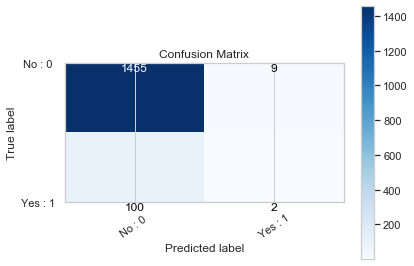

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1464
           1       0.18      0.02      0.04       102

    accuracy                           0.93      1566
   macro avg       0.56      0.51      0.50      1566
weighted avg       0.89      0.93      0.90      1566

Accuracy of the model:  0.9303959131545338


In [248]:
label = ["No : 0 ", "Yes : 1"]
plot_confusion_metrix(y_test, y_pred,label)

### Random Forest

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
model = RandomForestClassifier(min_samples_split=15,
                       max_depth=15,
                       max_features='auto',
                       n_estimators=500,
                       random_state=42,
                       min_samples_leaf=1)

model.fit(X_train_scale, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [251]:
y_pred = model.predict(X_test_scale)

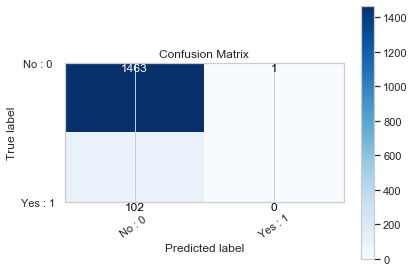

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1464
           1       0.00      0.00      0.00       102

    accuracy                           0.93      1566
   macro avg       0.47      0.50      0.48      1566
weighted avg       0.87      0.93      0.90      1566

Accuracy of the model:  0.934227330779055


In [252]:
label = ["No : 0 ", "Yes : 1"]
plot_confusion_metrix(y_test, y_pred,label)

# Decision Tree

In [255]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion = 'entropy',max_features=60,random_state=0,)
model_DecisionTree.fit(X_train_scale,y_train)

#fit the model on the data and predict the values 

y_pred = model_DecisionTree.predict(X_test_scale)


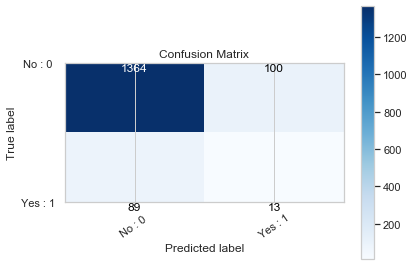

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1464
           1       0.12      0.13      0.12       102

    accuracy                           0.88      1566
   macro avg       0.53      0.53      0.53      1566
weighted avg       0.89      0.88      0.88      1566

Accuracy of the model:  0.8793103448275862


In [256]:
# Plot confusion Matrix

label = ["No : 0 ", "Yes : 1"]
plot_confusion_metrix(y_test, y_pred,label)

# Decision Tree With Balanced Data

In [257]:
model_DecisionTree2 = DecisionTreeClassifier(criterion = 'entropy',max_features=60,random_state=0,)
model_DecisionTree2.fit(x_resample, y_resample)

#fit the model on the data and predict the values 

y_pred = model_DecisionTree2.predict(X_test_scale)

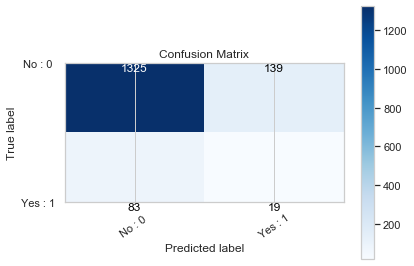

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1464
           1       0.12      0.19      0.15       102

    accuracy                           0.86      1566
   macro avg       0.53      0.55      0.53      1566
weighted avg       0.89      0.86      0.87      1566

Accuracy of the model:  0.8582375478927203


In [258]:
# Plot confusion Matrix

label = ["No : 0 ", "Yes : 1"]
plot_confusion_metrix(y_test, y_pred,label)

### FINAL MODEL

In [259]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion = 'entropy',max_features=60,random_state=0,)
model_DecisionTree.fit(X_train_scale,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=60, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [260]:
test.head(10)

,Customer_subtype,Houses,Avg_size,Avg_age,Customer_type,Roman_catholic,Protestant,Other_religion,No_religion,Married,Living_together,Other_relation,Singles,Without_children,with_children,High_education,Medium_education,Lower_education,High_status,Entrepreneur,Farmer,Middle_management,Skilled_labourers,Unskilled_labourers,Class_A,Class_B1,Class_B2,Class_C,Class_D,Rented_house,Home_owners,1_cars,2_cars,No_cars,National_health_service,Private_health_insurance,Income_<_30.000,Income_30-45.000,Income_45-75.000,Income_75-122.000,Income_>_123.000,Average_income,Purchasing_power_class,Private_third_party_insurance,Firms_insurance,Aggriculture_insurance,Car_policies,Delivery_van policies,Motorcycle/scooter_policies,Lorry_policies,Trailer_policies,Tractor_policies,Agricultural_machines_policies,Moped_policies,Life_insurances,Private_accident_insurance,Family_accidents_insurance,Disability_insurance,Fire_policies,Surfboard_policies,Boat_policies,Bicycle_policies,Property_insurance,Social_security_insurance,#_Private_third_party_insurance,#_Firms_insurance,#_Aggriculture_insurance,#_Car_policies,#_Delivery_van policies,#_Motorcycle/scooter_policies,#_Lorry_policies,#_Trailer_policies,#_Tractor_policies,#_Agricultural_machines_policies,#_Moped_policies,#_Life_insurances,#_Private_accident_insurance,#_Family_accidents_insurance,#_Disability_insurance,#_Fire_policies,#_Surfboard_policies,#_Boat_policies,#_Bicycle_policies,#_Property_insurance,#_Social_security insurance
0,33,1,4,2,8,0,6,0,3,5,0,4,1,1,8,2,2,6,0,0,1,2,6,1,0,2,1,5,3,1,8,8,1,1,8,1,3,3,3,0,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,2,2,1,4,5,5,4,0,5,0,0,4,0,0,4,3,0,2,1,3,6,9,0,0,7,2,1,1,5,4,0,6,8,2,0,0,6,0,4,0,0,0,0,0,3,0,0,0,4,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,2,3,2,3,6,2,4,4,2,1,1,3,2,2,1,1,5,2,1,1,8,6,2,2,6,3,2,4,3,1,0,3,5,2,0,0,6,0,0,0,0,0,0,0,4,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,4,1,2,4,4,2,4,4,2,1,1,5,1,2,3,1,3,2,2,3,6,7,2,1,7,2,2,5,3,1,0,4,4,2,0,0,5,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,0,0,0,6,3,0,0,9,0,0,0,2,4,4,0,0,0,7,2,9,0,7,2,0,9,0,5,4,0,0,0,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,30,1,2,4,7,1,4,2,3,5,0,4,4,3,2,1,2,6,1,0,1,3,3,3,1,1,2,5,1,5,4,5,1,4,9,0,2,5,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
6,35,1,2,4,8,2,5,1,2,8,0,1,2,5,3,1,5,4,2,0,0,3,3,3,1,1,5,4,0,8,1,8,1,1,4,5,2,5,2,0,0,3,5,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,6,1,3,3,2,3,4,2,2,9,0,0,0,5,4,4,4,2,4,3,0,2,0,2,6,1,0,2,0,0,9,5,4,0,3,6,1,3,4,2,2,6,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,4,1,2,4,1,0,7,2,0,9,0,0,1,7,2,3,4,2,2,0,0,4,3,1,2,3,1,4,1,7,2,7,0,2,7,2,3,3,3,1,0,4,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,10,1,4,2,3,0,7,0,2,9,0,0,0,2,7,2,3,5,0,0,0,5,2,3,0,4,0,5,0,0,9,6,1,2,6,3,0,7,2,0,0,4,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [261]:
# scale the test set 
test = mm_scaler.transform(test)

In [262]:
test

array([[0.8  , 0.   , 0.75 , ..., 0.   , 0.   , 0.   ],
       [0.125, 0.   , 0.5  , ..., 0.   , 0.   , 0.   ],
       [0.95 , 0.   , 0.5  , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.875, 0.   , 0.25 , ..., 0.   , 0.5  , 0.   ],
       [0.8  , 0.   , 0.5  , ..., 0.   , 0.   , 0.   ],
       [0.175, 0.   , 0.25 , ..., 0.   , 0.   , 0.   ]])

In [263]:
y_test_prediction = pd.Series(model_DecisionTree.predict(test))

In [264]:
y_test_prediction.value_counts()

0    3429
1     264
dtype: int64

In [265]:
final_test_df = pd.read_table("DATA/caravan.test",names=new_cols[:-1])

In [266]:
final_test_df["PREDICTED_CARAVAN"] = y_test_prediction

In [267]:
final_test_df.head(10)

,Customer_subtype,Houses,Avg_size,Avg_age,Customer_type,Roman_catholic,Protestant,Other_religion,No_religion,Married,Living_together,Other_relation,Singles,Without_children,with_children,High_education,Medium_education,Lower_education,High_status,Entrepreneur,Farmer,Middle_management,Skilled_labourers,Unskilled_labourers,Class_A,Class_B1,Class_B2,Class_C,Class_D,Rented_house,Home_owners,1_cars,2_cars,No_cars,National_health_service,Private_health_insurance,Income_<_30.000,Income_30-45.000,Income_45-75.000,Income_75-122.000,Income_>_123.000,Average_income,Purchasing_power_class,Private_third_party_insurance,Firms_insurance,Aggriculture_insurance,Car_policies,Delivery_van policies,Motorcycle/scooter_policies,Lorry_policies,Trailer_policies,Tractor_policies,Agricultural_machines_policies,Moped_policies,Life_insurances,Private_accident_insurance,Family_accidents_insurance,Disability_insurance,Fire_policies,Surfboard_policies,Boat_policies,Bicycle_policies,Property_insurance,Social_security_insurance,#_Private_third_party_insurance,#_Firms_insurance,#_Aggriculture_insurance,#_Car_policies,#_Delivery_van policies,#_Motorcycle/scooter_policies,#_Lorry_policies,#_Trailer_policies,#_Tractor_policies,#_Agricultural_machines_policies,#_Moped_policies,#_Life_insurances,#_Private_accident_insurance,#_Family_accidents_insurance,#_Disability_insurance,#_Fire_policies,#_Surfboard_policies,#_Boat_policies,#_Bicycle_policies,#_Property_insurance,#_Social_security insurance,PREDICTED_CARAVAN
0,33,1,4,2,8,0,6,0,3,5,0,4,1,1,8,2,2,6,0,0,1,2,6,1,0,2,1,5,3,1,8,8,1,1,8,1,3,3,3,0,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0
1,6,1,3,2,2,0,5,0,4,5,2,2,1,4,5,5,4,0,5,0,0,4,0,0,4,3,0,2,1,3,6,9,0,0,7,2,1,1,5,4,0,6,8,2,0,0,6,0,4,0,0,0,0,0,3,0,0,0,4,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0.0
2,39,1,3,3,9,1,4,2,3,5,2,3,2,3,6,2,4,4,2,1,1,3,2,2,1,1,5,2,1,1,8,6,2,2,6,3,2,4,3,1,0,3,5,2,0,0,6,0,0,0,0,0,0,0,4,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.0
3,9,1,2,3,3,2,3,2,4,5,4,1,2,4,4,2,4,4,2,1,1,5,1,2,3,1,3,2,2,3,6,7,2,1,7,2,2,5,3,1,0,4,4,2,0,0,5,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0
4,31,1,2,4,7,0,2,0,7,9,0,0,0,6,3,0,0,9,0,0,0,2,4,4,0,0,0,7,2,9,0,7,2,0,9,0,5,4,0,0,0,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0
5,30,1,2,4,7,1,4,2,3,5,0,4,4,3,2,1,2,6,1,0,1,3,3,3,1,1,2,5,1,5,4,5,1,4,9,0,2,5,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0.0
6,35,1,2,4,8,2,5,1,2,8,0,1,2,5,3,1,5,4,2,0,0,3,3,3,1,1,5,4,0,8,1,8,1,1,4,5,2,5,2,0,0,3,5,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0
7,6,1,3,3,2,3,4,2,2,9,0,0,0,5,4,4,4,2,4,3,0,2,0,2,6,1,0,2,0,0,9,5,4,0,3,6,1,3,4,2,2,6,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
8,4,1,2,4,1,0,7,2,0,9,0,0,1,7,2,3,4,2,2,0,0,4,3,1,2,3,1,4,1,7,2,7,0,2,7,2,3,3,3,1,0,4,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0
9,10,1,4,2,3,0,7,0,2,9,0,0,0,2,7,2,3,5,0,0,0,5,2,3,0,4,0,5,0,0,9,6,1,2,6,3,0,7,2,0,0,4,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0


## Export the final data-frame to Root Directory

In [268]:
final_test_df.to_csv('final_data_with_prediction.csv')